목적 : 탐색적 데이터 분석 EDA
=====================
목표 : 기초통계량, 상관분석(+유의성 검정),Q-Qplot
-------------------------    

import modules

In [14]:
import pandas as pd
import numpy as np


%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

import platform
if platform.system() == "Darwin":           # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')


import scipy.stats as stats
from scipy.stats import shapiro, pearsonr
from itertools import combinations
from sklearn.model_selection import train_test_split

환경설정

In [15]:
# pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows')

# pd.set_option('display.max_columns', None)
pd.reset_option('display.max_columns')

pd.set_option('display.max_seq_items', None)

pd.set_option('float_format', '{:.3f}'.format) # 소수점 3개까지 출력

load file

In [16]:
listed = pd.read_csv("./상장후보피처+시장지표.csv")
# 영업년수와 상장년수가 있더라

# train test split

In [17]:
X = listed.drop('부실판단', axis=1)
y = listed['부실판단']
# 데이터를 학습용과 테스트용으로 나눔
listed_X_train, listed_X_test, listed_y_train, listed_y_test = train_test_split(X, y, test_size= 1 / (np.exp(1) + 1) , random_state=911, stratify=y)

In [18]:
listed_X_train['부실판단'] = listed_y_train

In [19]:
len(X)

731

In [20]:
len(listed_X_train)

534

In [21]:
len(listed_X_test)

197

# 범주 분할 1현금흐름 / 2안정성 / 2수익성 / 3유동성 / 4성장성 / 5생산성 / 6활동성 / 7시장지표 및 기타

In [22]:
# 상장 all data는 unlisted
# 상장 label들

labels = listed_X_train[
    [
        '거래소코드',
        '회계년도',
        '부실판단',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기'
    ]
]

# 상장 피처
features = listed_X_train.drop(
    labels=[
        '회사명',
        '거래소코드',
        '회계년도',
        '도입기',
        '성숙기',
        '성장기',
        '쇠퇴기',
        '부실판단'
    ],
    axis=1,    
)

# 현금흐름 4개
cash_etc_ft1 = listed_X_train[
    [
        'CASH FLOW 대 부채비율',
        'CASH FLOW 대 차입금비율',
        'CASH FLOW 대 총자본비율',
        'CASH FLOW 대 매출액비율',
        '영업년수',
        '상장년수',
        'PER',
        'PBR',
        'PCR',
        'PSR'
    ]
]

# 안정성 9개
stability_ft1 = listed_X_train[
    [
        '유동비율',
        '당좌비율',
        '부채비율',
        '유동부채비율',
        '차입금의존도',
        '순운전자본비율',
        '현금비율',
        '유동자산구성비율',
        '자기자본구성비율'
    ]
]

# 수익성 8개
profitability_ft1 = listed_X_train[
    [
        '자기자본순이익률',
        '경영자본순이익률',
        '매출액순이익률',
        '총자본사업이익률',
        '총자본정상영업이익률',
        '매출액정상영업이익률',
        '금융비용부담률',
        'CROE'
    ]
]

# 성장성 6개
growth_ft1 = listed_X_train[
    [
        '총자산증가율',
        '총자본증가율',
        '유동자산증가율',
        '비유동자산증가율',
        '매출액증가율',
        '유형자산증가율'
    ]
]

# 생산성 6개
productivity_ft1 = listed_X_train[
    [
        '부가가치(백만원)',
        '총자본투자효율',
        '설비투자효율',
        '부가가치율',
        '이윤분배율',
        '자본분배율'
    ]
]

# 활동성 8개
activity_ft1 = listed_X_train[
    [
        '총자산회전율',
        '매출채권회전률',
        '당좌자산회전률',
        '유형자산회전율',
        '경영자본회전률',
        '총자본회전률',
        '비유동자산회전률',
        '유동자산회전률'
    ]
]

# 시장지표 및 기타
etc_ft1 = listed_X_train[
    [
        '영업년수',
        '상장년수',
        'PER',
        'PBR',
        'PCR',
        'PSR'
    ]
]

# describe

In [23]:
listed_X_train['부실판단'] = listed_y_train

In [24]:
listed_X_train

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,상장년수,PER,PBR,PCR,PSR,도입기,성숙기,성장기,쇠퇴기,부실판단
563,성우테크론(주),45300,2014,9,13,4,9,76,76,75,...,23.000,-13.309,415.231,8357.516,593.832,0,0,1,0,1.000
54,(주)동일기연,32960,2022,76,363,5,12,2011,1533,7,...,27.000,19.185,757.326,12876.467,1763.156,0,1,0,0,0.000
265,(주)엔지켐생명과학,183490,2020,-28,-34,-12,-56,1073,979,71,...,6.000,-51.340,12062.574,-62358.977,33864.410,1,0,0,0,1.000
634,유엔젤(주),72130,2022,-2,-8,0,-1,745,730,13,...,21.000,47.778,738.523,-16240.220,1321.965,0,0,0,1,0.000
286,(주)오이솔루션,138080,2022,-1,-2,0,-1,255,158,27,...,10.000,-36.066,1266.354,-23431.206,2429.817,0,0,0,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,한국정밀기계(주),101680,2014,11,21,3,9,383,148,34,...,15.000,-4.289,355.983,9522.382,822.739,0,0,1,0,1.000
409,(주)코세스,89890,2015,7,15,6,5,58,40,754,...,18.000,-31.818,6549.214,75714.717,654.188,0,1,0,0,1.000
344,(주)인터로조,119610,2022,18,29,5,10,215,166,39,...,14.000,16.482,1970.395,30936.894,2936.356,0,0,1,0,0.000
273,(주)엠젠솔루션,32790,2014,4,9,3,1,99,89,242,...,27.000,-3.507,619.574,12727.985,76.843,0,1,0,0,1.000


In [25]:
listed_X_train.describe()

,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,유동부채비율,...,상장년수,PER,PBR,PCR,PSR,도입기,성숙기,성장기,쇠퇴기,부실판단
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,...,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,138169.607,2019.702,9.307,1664.285,-0.176,-0.968,299.161,247.049,128.135,101.848,...,15.088,-21.022,1092109.646,-284878.081,85349.027,0.298,0.290,0.223,0.189,0.504
std,121484.287,3.015,47.127,26931.452,14.915,29.483,384.260,353.386,419.643,381.869,...,9.222,1054.601,22750722.884,4583424.522,602976.349,0.458,0.454,0.417,0.392,0.500
min,40.000,2014.000,-276.000,-5211.000,-255.000,-451.000,4.000,4.000,0.000,0.000,...,1.000,-18475.906,-22699100.146,-48253995.691,0.000,0.000,0.000,0.000,0.000,0.000
25%,49952.500,2017.000,-10.000,-15.000,-5.000,-8.000,103.000,70.000,32.000,20.000,...,8.000,-9.801,951.788,-20800.741,780.480,0.000,0.000,0.000,0.000,0.000
50%,101205.000,2022.000,2.000,2.000,1.000,1.000,166.000,121.500,72.000,49.000,...,14.000,-1.024,1543.605,2698.462,1523.246,0.000,0.000,0.000,0.000,1.000
75%,214445.000,2022.000,18.000,35.000,6.000,9.750,319.000,260.500,128.000,100.000,...,22.000,16.490,2976.185,14736.564,3101.435,1.000,1.000,0.000,0.000,1.000
max,900300.000,2022.000,259.000,611057.000,44.000,90.000,3542.000,3246.000,9039.000,8254.000,...,51.000,8800.000,524652402.569,42386363.636,8026120.090,1.000,1.000,1.000,1.000,1.000


In [26]:
listed_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 534 entries, 563 to 340
Data columns (total 55 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   회사명                534 non-null    object 
 1   거래소코드              534 non-null    int64  
 2   회계년도               534 non-null    int64  
 3   CASH FLOW 대 부채비율   534 non-null    int64  
 4   CASH FLOW 대 차입금비율  534 non-null    int64  
 5   CASH FLOW 대 총자본비율  534 non-null    int64  
 6   CASH FLOW 대 매출액비율  534 non-null    int64  
 7   유동비율               534 non-null    int64  
 8   당좌비율               534 non-null    int64  
 9   부채비율               534 non-null    int64  
 10  유동부채비율             534 non-null    int64  
 11  차입금의존도             534 non-null    int64  
 12  순운전자본비율            534 non-null    int64  
 13  현금비율               534 non-null    int64  
 14  유동자산구성비율           534 non-null    int64  
 15  자기자본구성비율           534 non-null    int64  
 16  자기자본순이익률           534 non-nu

In [27]:
listed_X_train.columns

Index(['회사명', '거래소코드', '회계년도', 'CASH FLOW 대 부채비율', 'CASH FLOW 대 차입금비율',
       'CASH FLOW 대 총자본비율', 'CASH FLOW 대 매출액비율', '유동비율', '당좌비율', '부채비율',
       '유동부채비율', '차입금의존도', '순운전자본비율', '현금비율', '유동자산구성비율', '자기자본구성비율',
       '자기자본순이익률', '경영자본순이익률', '매출액순이익률', '총자본사업이익률', '총자본정상영업이익률',
       '매출액정상영업이익률', '금융비용부담률', 'CROE', '총자산증가율', '총자본증가율', '유동자산증가율',
       '비유동자산증가율', '매출액증가율', '유형자산증가율', '부가가치(백만원)', '총자본투자효율', '설비투자효율',
       '부가가치율', '이윤분배율', '자본분배율', '총자산회전율', '매출채권회전률', '당좌자산회전률', '유형자산회전율',
       '경영자본회전률', '총자본회전률', '비유동자산회전률', '유동자산회전률', '영업년수', '상장년수', 'PER',
       'PBR', 'PCR', 'PSR', '도입기', '성숙기', '성장기', '쇠퇴기', '부실판단'],
      dtype='object')

In [28]:
listed_X_train.isna().sum().sort_values(ascending=False)

회사명                  0
총자본회전률               0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
경영자본회전률              0
비유동자산회전률             0
매출액증가율               0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
도입기                  0
성숙기                  0
성장기                  0
쇠퇴기                  0
유형자산증가율              0
비유동자산증가율             0
거래소코드                0
현금비율                 0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
순운전자본비율              0
유동자산구성비율             0
유동자산증가율              0
자기자본구성비율   

In [29]:
listed_X_train.isin([0]).sum().sort_values(ascending=False)

쇠퇴기                  433
성장기                  415
성숙기                  379
도입기                  375
부실판단                 265
총자본회전률               198
경영자본회전률              130
이윤분배율                 82
자본분배율                 81
비유동자산회전률              53
유동자산회전률               46
당좌자산회전률               35
차입금의존도                33
CASH FLOW 대 총자본비율     23
비유동자산증가율              14
CASH FLOW 대 차입금비율     14
총자본증가율                13
유동자산증가율               13
매출액증가율                13
유형자산증가율               13
유형자산회전율               13
현금비율                  10
CASH FLOW 대 매출액비율      8
CASH FLOW 대 부채비율       6
순운전자본비율                5
PSR                    5
PCR                    5
PBR                    5
PER                    5
유동부채비율                 4
부채비율                   3
자기자본구성비율               3
CROE                   2
자기자본순이익률               2
매출채권회전률                1
총자본투자효율                1
총자본정상영업이익률             1
부가가치율                  1
설비투자효율                 0
회계년도                   0


In [30]:
listed_X_train.isin([np.inf]).sum().sort_values(ascending=True)

회사명                  0
유형자산증가율              0
부가가치(백만원)            0
총자본투자효율              0
설비투자효율               0
부가가치율                0
이윤분배율                0
자본분배율                0
총자산회전율               0
매출채권회전률              0
당좌자산회전률              0
유형자산회전율              0
매출액증가율               0
경영자본회전률              0
비유동자산회전률             0
유동자산회전률              0
영업년수                 0
상장년수                 0
PER                  0
PBR                  0
PCR                  0
PSR                  0
도입기                  0
성숙기                  0
성장기                  0
총자본회전률               0
쇠퇴기                  0
비유동자산증가율             0
총자본증가율               0
거래소코드                0
회계년도                 0
CASH FLOW 대 부채비율     0
CASH FLOW 대 차입금비율    0
CASH FLOW 대 총자본비율    0
CASH FLOW 대 매출액비율    0
유동비율                 0
당좌비율                 0
부채비율                 0
유동부채비율               0
차입금의존도               0
유동자산증가율              0
순운전자본비율              0
유동자산구성비율             0
자기자본구성비율   

1현금흐름

In [31]:
cash_etc_ft1.describe()

,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,영업년수,상장년수,PER,PBR,PCR,PSR
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,9.307,1664.285,-0.176,-0.968,26.813,15.088,-21.022,1092109.646,-284878.081,85349.027
std,47.127,26931.452,14.915,29.483,13.591,9.222,1054.601,22750722.884,4583424.522,602976.349
min,-276.000,-5211.000,-255.000,-451.000,5.000,1.000,-18475.906,-22699100.146,-48253995.691,0.000
25%,-10.000,-15.000,-5.000,-8.000,18.000,8.000,-9.801,951.788,-20800.741,780.480
50%,2.000,2.000,1.000,1.000,25.000,14.000,-1.024,1543.605,2698.462,1523.246
75%,18.000,35.000,6.000,9.750,32.000,22.000,16.490,2976.185,14736.564,3101.435
max,259.000,611057.000,44.000,90.000,107.000,51.000,8800.000,524652402.569,42386363.636,8026120.090


2안정성

In [32]:
stability_ft1.describe()

,유동비율,당좌비율,부채비율,유동부채비율,차입금의존도,순운전자본비율,현금비율,유동자산구성비율,자기자본구성비율
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,299.161,247.049,128.135,101.848,24.283,20.483,73.451,56.045,58.133
std,384.260,353.386,419.643,381.869,18.086,28.768,154.410,94.698,21.437
min,4.000,4.000,0.000,0.000,0.000,-90.000,0.000,3.000,0.000
25%,103.000,70.000,32.000,20.000,9.000,2.000,14.000,39.000,43.250
50%,166.000,121.500,72.000,49.000,23.000,19.500,30.000,51.000,57.500
75%,319.000,260.500,128.000,100.000,37.000,39.750,75.000,65.000,75.750
max,3542.000,3246.000,9039.000,8254.000,151.000,186.000,1981.000,2198.000,96.000


3수익성

In [33]:
profitability_ft1.describe()

,자기자본순이익률,경영자본순이익률,매출액순이익률,총자본사업이익률,총자본정상영업이익률,매출액정상영업이익률,금융비용부담률,CROE
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,-14.755,-6.884,-13.309,-1.372,-1.879,-7.316,1.686,-5.558
std,48.184,30.357,54.464,13.993,13.982,43.065,4.355,45.017
min,-526.500,-482.900,-826.180,-118.160,-119.320,-745.090,-15.020,-353.740
25%,-23.130,-13.968,-21.220,-6.348,-6.883,-13.043,-0.300,-13.300
50%,-1.210,-0.800,-1.075,1.005,0.565,0.915,0.935,-2.195
75%,7.580,5.725,7.438,5.295,4.890,7.870,2.748,4.945
max,95.370,66.600,129.350,57.730,57.310,53.570,47.280,377.450


4성장성

In [34]:
growth_ft1.describe()

,총자산증가율,총자본증가율,유동자산증가율,비유동자산증가율,매출액증가율,유형자산증가율
count,534.000,534.000,534.000,534.000,534.000,534.000
mean,9.041,8.609,8.737,17.879,15.207,97.658
std,37.323,36.726,49.431,85.872,74.041,1759.522
min,-86.924,-80.960,-97.710,-91.420,-95.700,-99.670
25%,-6.210,-5.885,-13.680,-7.522,-10.820,-6.730
50%,3.262,2.430,0.810,0.985,4.640,0.000
75%,17.066,16.050,19.525,20.078,24.170,15.670
max,419.817,419.820,479.050,1160.470,1031.410,40598.090


5생산성

In [35]:
productivity_ft1.describe()

,부가가치(백만원),총자본투자효율,설비투자효율,부가가치율,이윤분배율,자본분배율
count,534.000,534.000,534.000,534.000,534.000,534.000
mean,16332.693,12.268,-127.650,19.770,-64.000,-19.573
std,25344.103,24.878,6502.675,40.874,267.864,187.620
min,-56429.000,-411.000,-145764.000,-345.000,-2834.000,-2061.000
25%,3615.750,5.000,18.000,10.000,-38.000,0.000
50%,10718.500,13.000,51.500,21.000,0.000,21.000
75%,23787.000,22.000,114.750,36.750,26.000,45.750
max,260543.000,99.000,25992.000,188.000,292.000,93.000


6활동성

In [36]:
activity_ft1.describe()

,총자산회전율,매출채권회전률,당좌자산회전률,유형자산회전율,경영자본회전률,총자본회전률,비유동자산회전률,유동자산회전률
count,534.000,534.000,534.000,534.000,534.000,534.000,534.000,534.000
mean,0.678,7.912,2.022,13.163,0.850,0.680,1.946,1.404
std,0.427,7.815,1.625,103.168,0.780,0.657,2.979,0.905
min,0.078,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.390,4.240,1.000,1.000,1.000,0.000,1.000,1.000
50%,0.587,6.245,2.000,3.000,1.000,1.000,1.000,1.000
75%,0.887,9.172,3.000,5.000,1.000,1.000,2.000,2.000
max,3.842,86.680,17.000,2292.000,13.000,9.000,52.000,10.000


7시장지표 및 기타

In [37]:
etc_ft1.describe()

,영업년수,상장년수,PER,PBR,PCR,PSR
count,534.000,534.000,534.000,534.000,534.000,534.000
mean,26.813,15.088,-21.022,1092109.646,-284878.081,85349.027
std,13.591,9.222,1054.601,22750722.884,4583424.522,602976.349
min,5.000,1.000,-18475.906,-22699100.146,-48253995.691,0.000
25%,18.000,8.000,-9.801,951.788,-20800.741,780.480
50%,25.000,14.000,-1.024,1543.605,2698.462,1523.246
75%,32.000,22.000,16.490,2976.185,14736.564,3101.435
max,107.000,51.000,8800.000,524652402.569,42386363.636,8026120.090


# before Q-Qplot

In [38]:
def qq_plot(df):
    fig, axes = plt.subplots(8, 6, figsize=(20, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(8):
        for j in range(6):
            col_index = i * 6 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

In [39]:
len(features.columns)

47

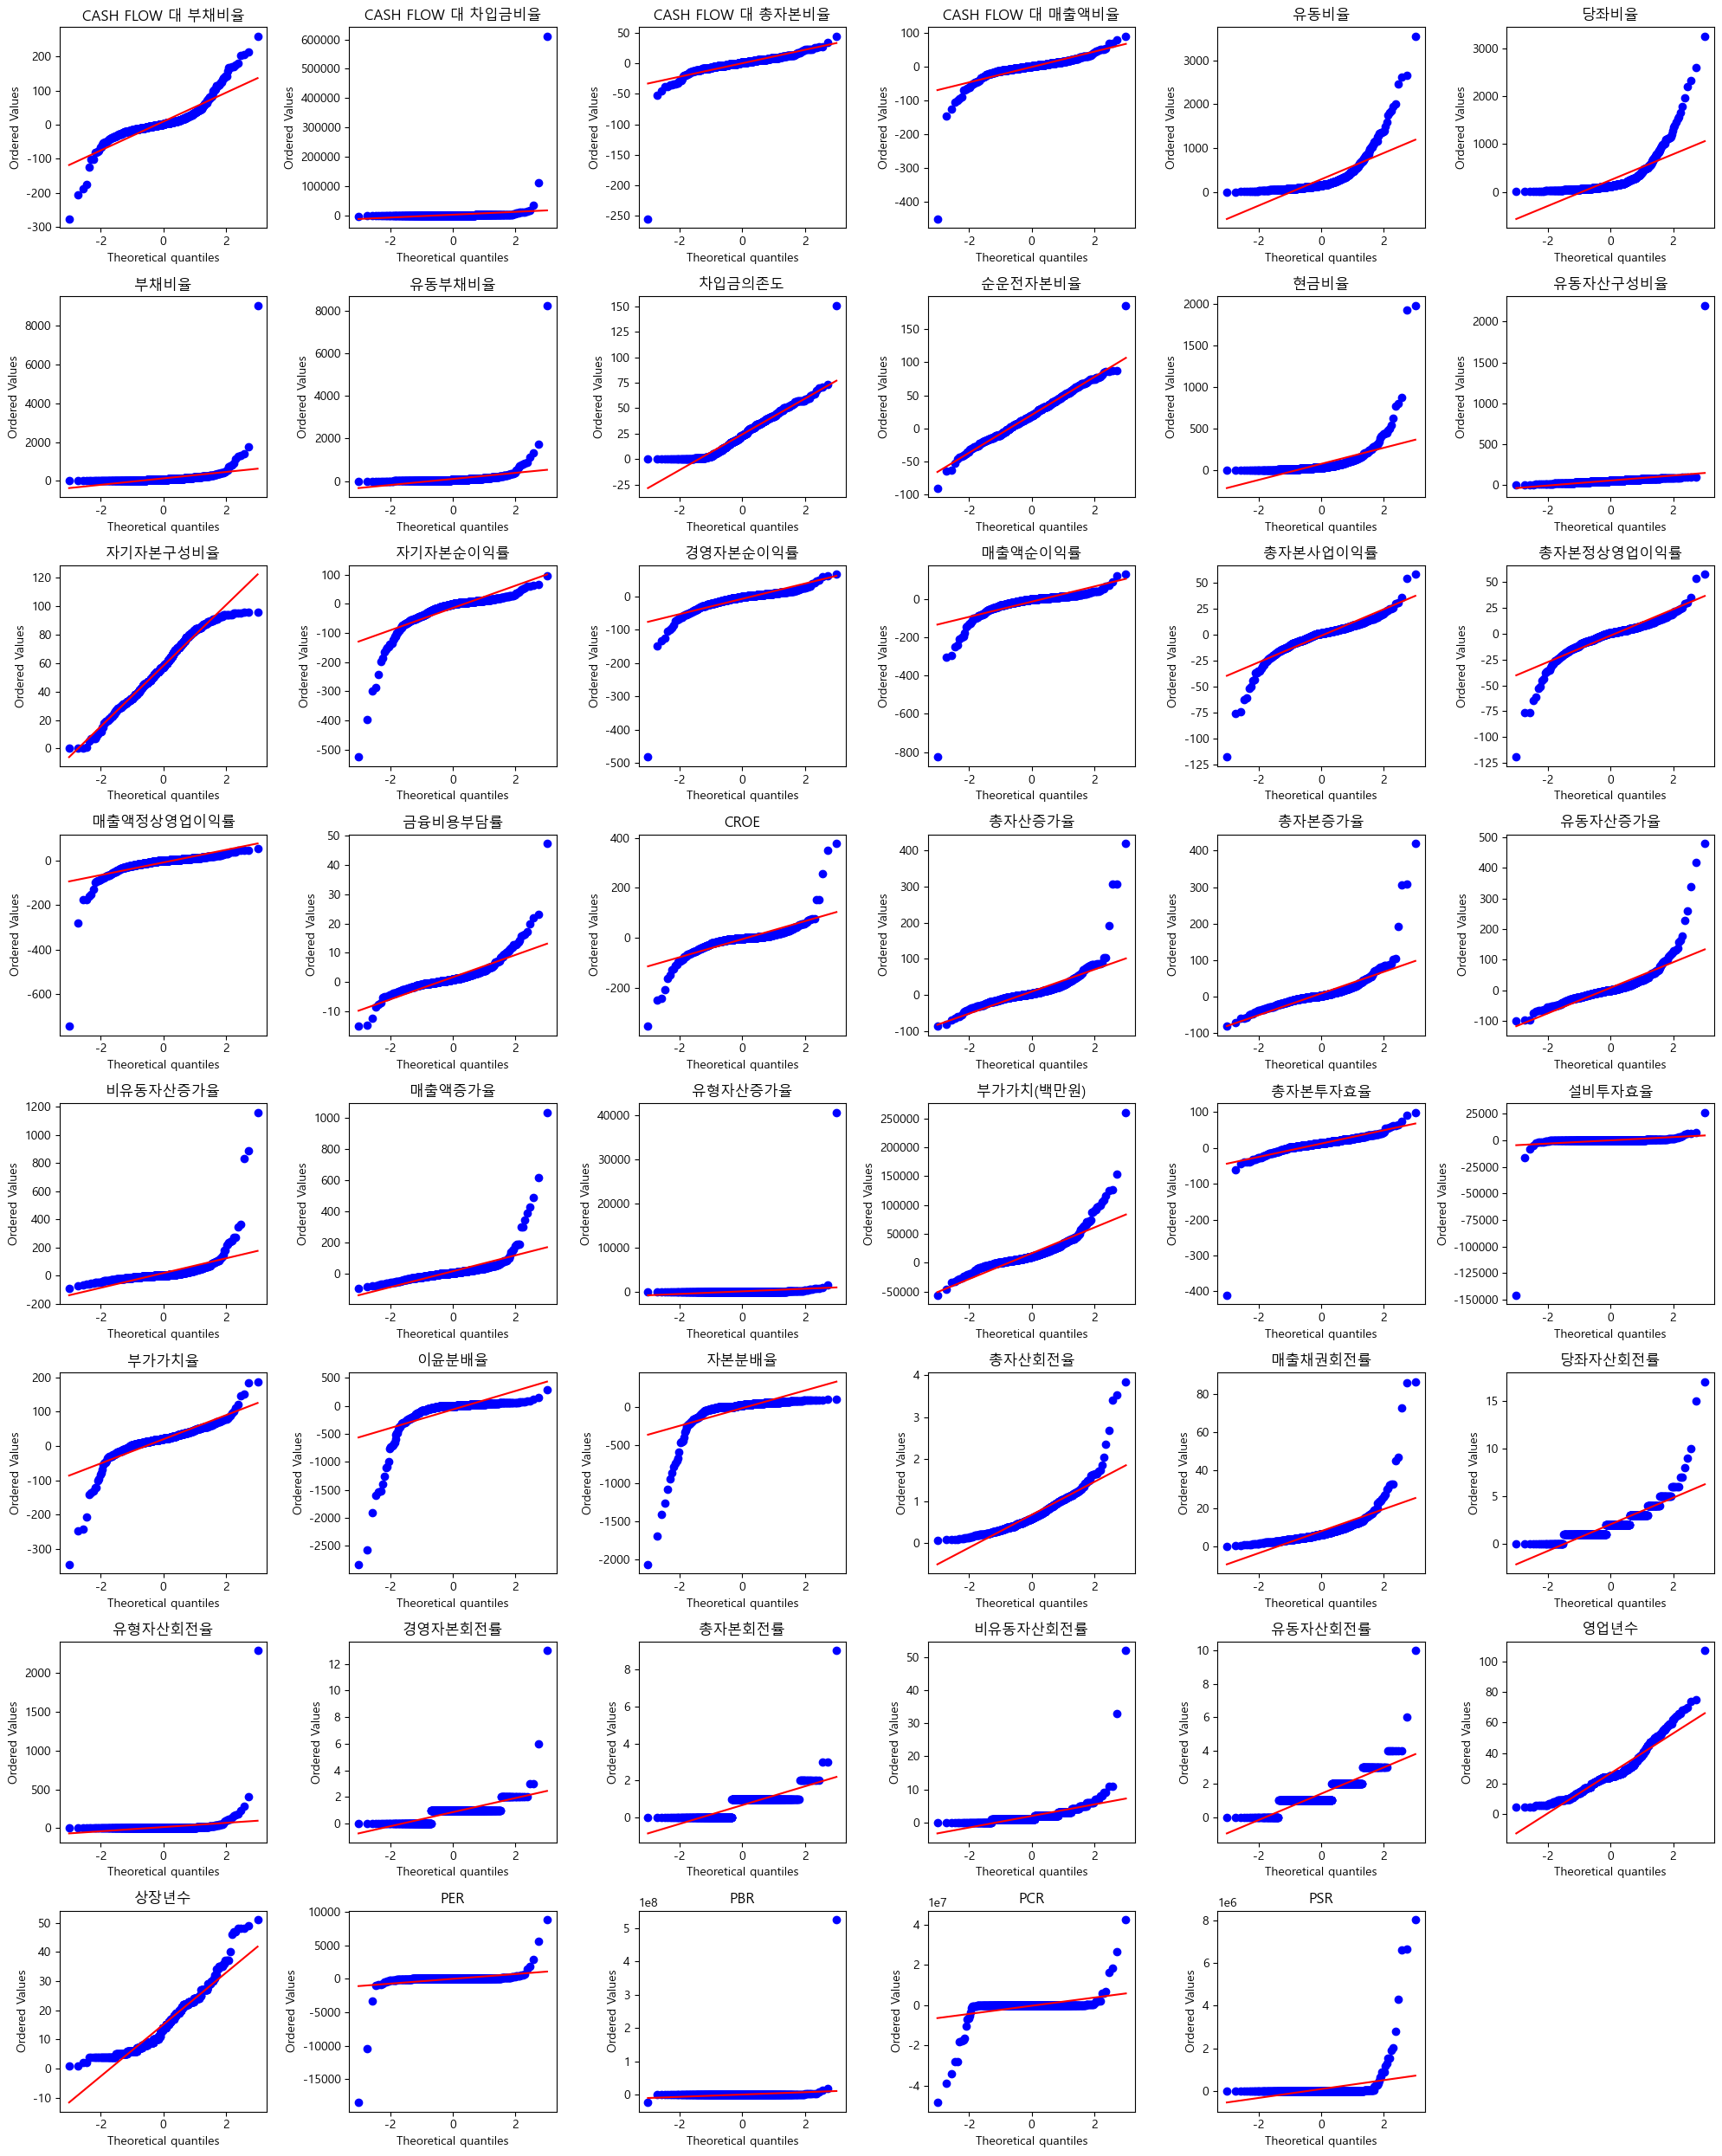

In [40]:
qq_plot(features)

In [101]:
def qq_plot33(df):
    fig, axes = plt.subplots(3, 3, figsize=(20, 25))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)  # 서브플롯 간 간격 조정
    
    for i in range(3):
        for j in range(3):
            col_index = i * 3 + j
            if col_index < len(df.columns):
                # Q-Q plot 그리기
                stats.probplot(df[df.columns[col_index]], dist="norm", plot=axes[i, j])
                axes[i, j].set_title(f"{df.columns[col_index]}")
            else:
                # 데이터프레임 칼럼 수보다 많은 서브플롯은 숨김
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# 윈저라이징

In [41]:
# 한 컬럼마다 할 수 있는 윈저라이징
def winsorize(data, lower_percentile=5, upper_percentile=95):
    """
    이상치를 Winsorizing하여 데이터를 변형하는 함수
    
    Parameters:
    - data: 변형하려는 데이터 배열
    - lower_percentile: 이상치를 대체할 하한 백분위수
    - upper_percentile: 이상치를 대체할 상한 백분위수
    
    Returns:
    - winsorized_data: Winsorizing이 적용된 데이터 배열
    """
    lower_limit = np.percentile(data, lower_percentile)
    upper_limit = np.percentile(data, upper_percentile)
    
    daco = data.copy()
    # 하한 이상치 대체
    daco[daco < lower_limit] = lower_limit
    
    # 상한 이상치 대체
    daco[daco > upper_limit] = upper_limit
    
    return daco

In [42]:
# 모든 컬럼을 일괄 윈저라이징
def adj_outlier(df, target=0.01, winsorizing=True):
    """
    데이터프레임에서 이상치를 조정합니다.

    매개변수:
    - dataframe: pandas DataFrame
    - 목표값: float, 이상치 식별을 위한 임계값
    - 윈저라이징: bool, 윈저라이징 기법을 적용할지 여부

    반환값:
    - 이상치가 조정된 pandas DataFrame
    """
    # 원본 DataFrame을 직접 수정하지 않기 위해 복사합니다.
    df_copy = df.copy()

    # 목표값에 기반하여 이상치를 식별합니다.    
    lower_bound = df_copy.quantile(target)
    upper_bound = df_copy.quantile(1 - target)

    # 윈저라이징이 지정된 경우 해당 열에 대해 이상치를 조정합니다.
    if winsorizing:
        df_copy = df_copy.apply(lambda x: np.clip(x, lower_bound[x.name], upper_bound[x.name]))

    return df_copy

# 예제 사용법:
# '당신의_데이터프레임'이 실제 데이터프레임인 경우
# 조정된_데이터프레임 = 이상치_조정(당신의_데이터프레임)

# 일괄 Q-Qplot

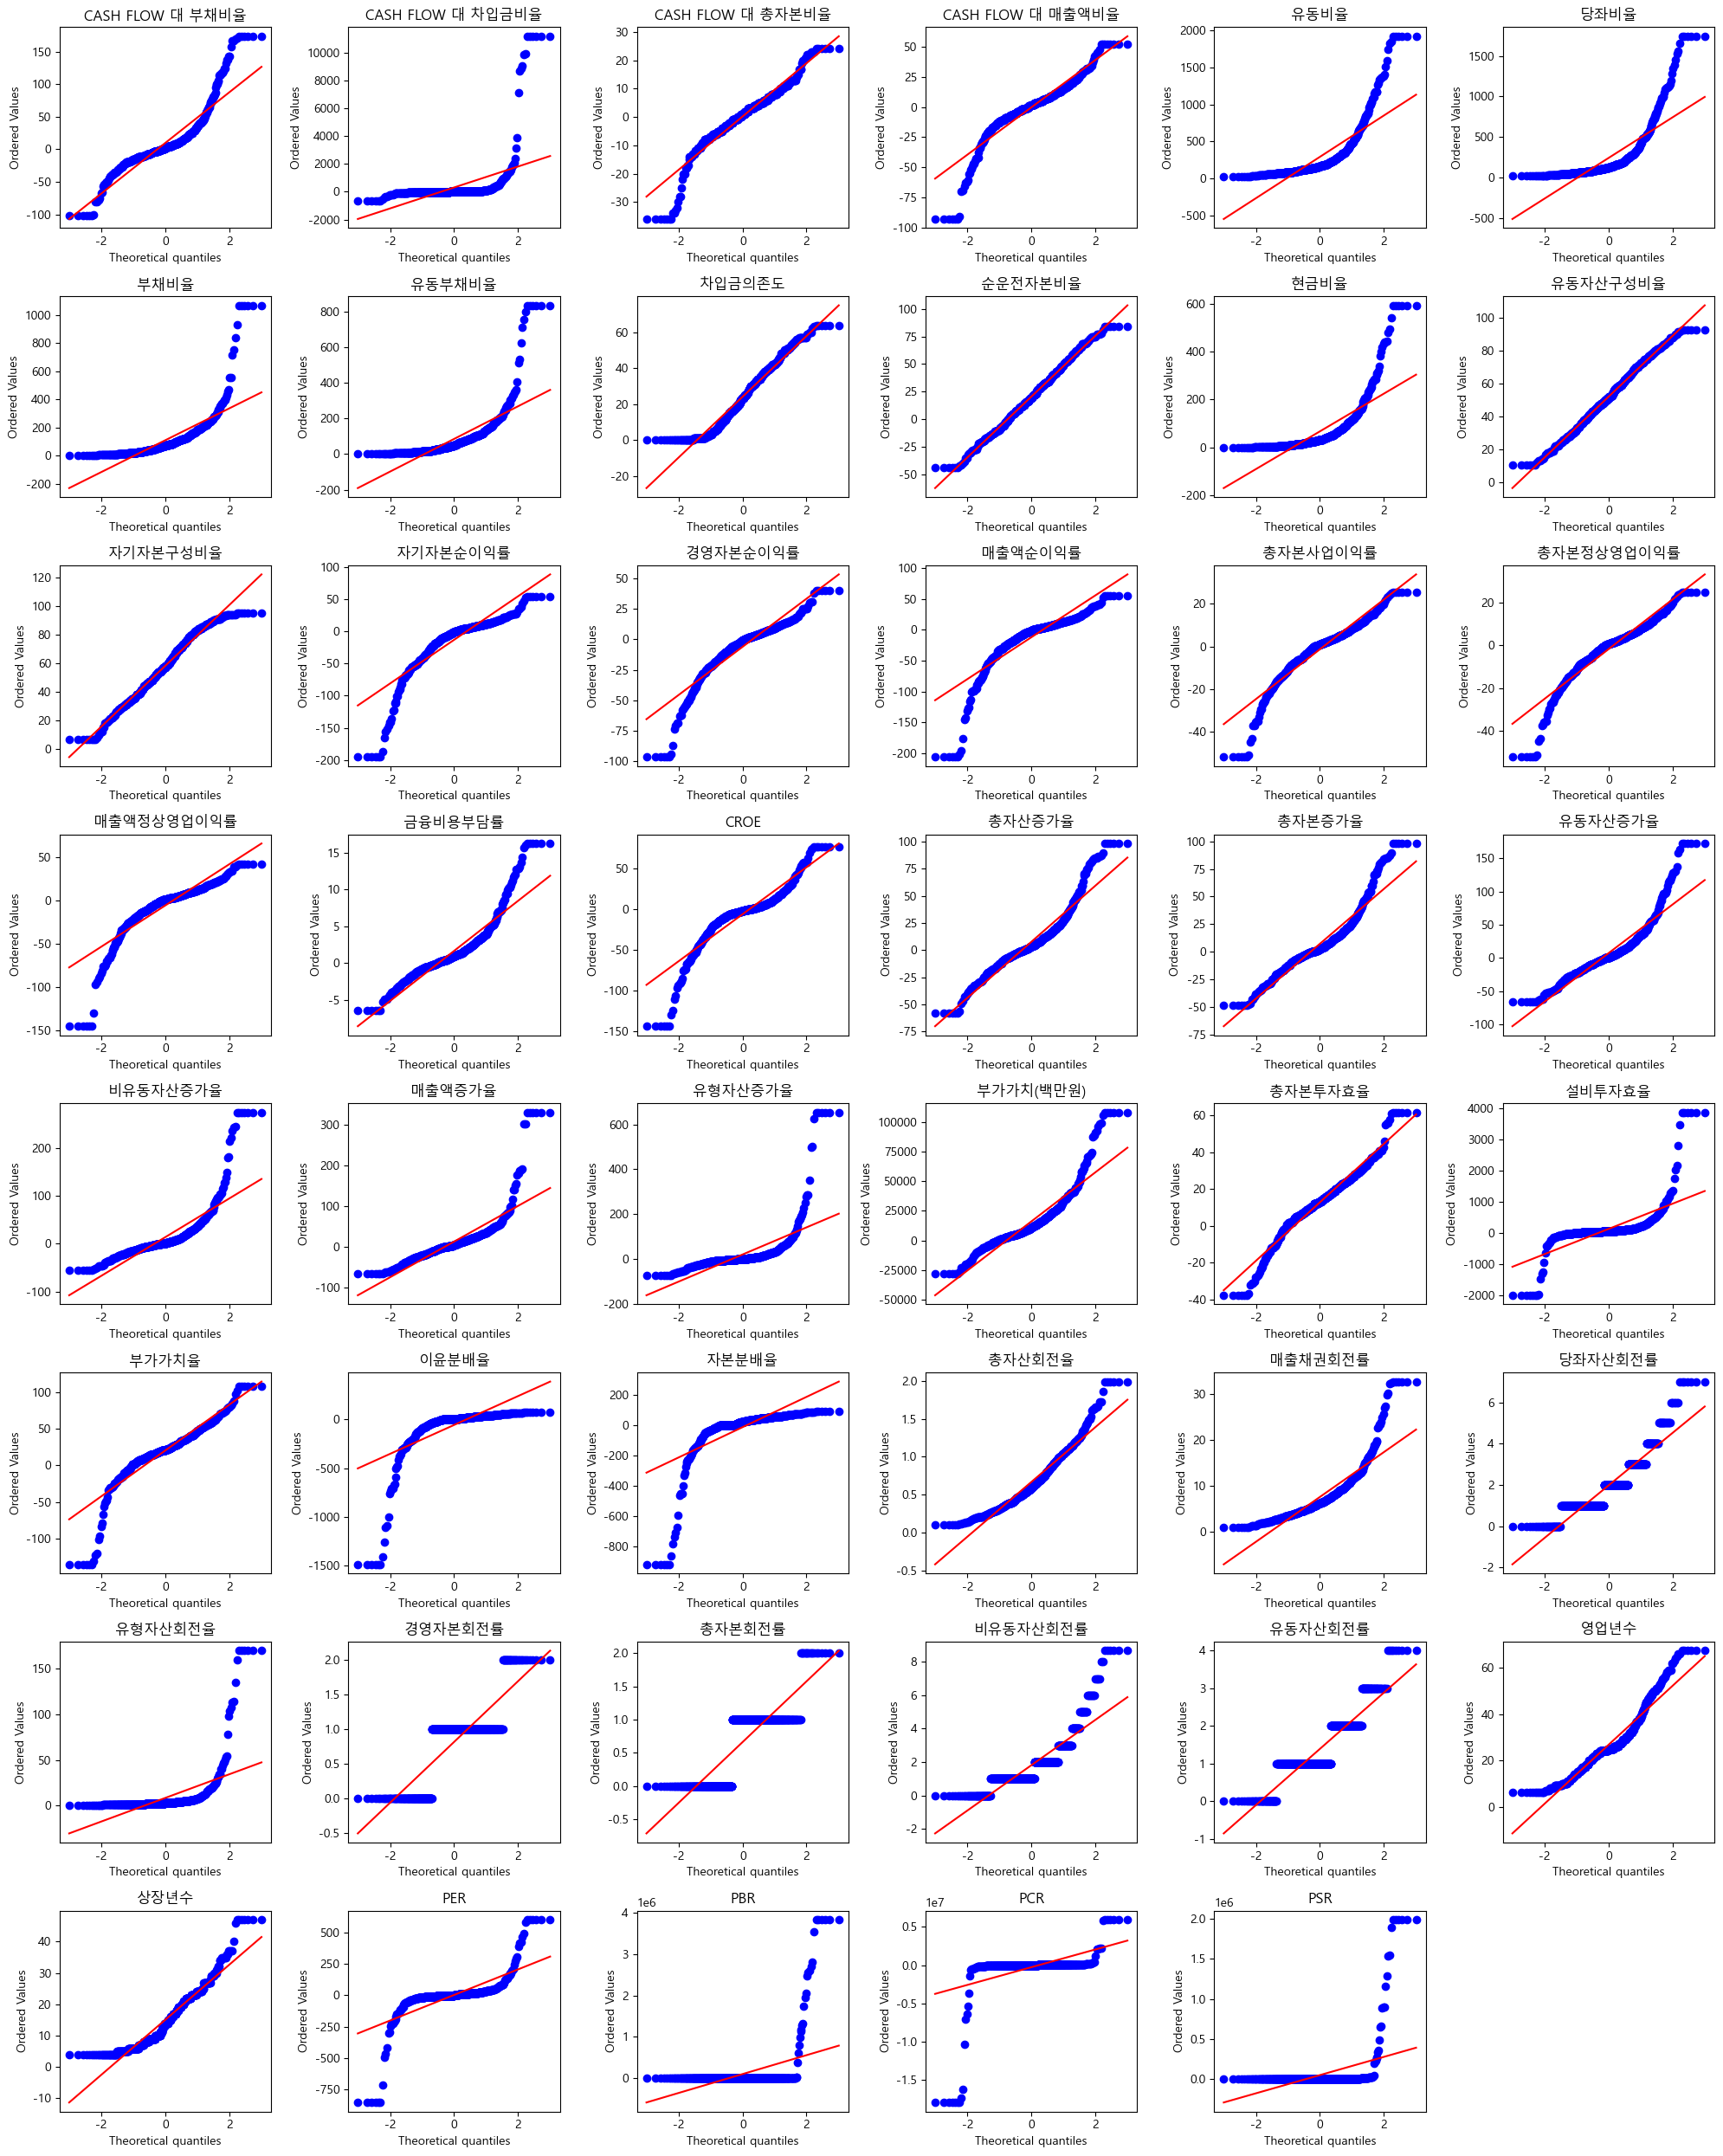

In [43]:
adj_features = adj_outlier(features, target=0.01, winsorizing=True)
qq_plot(adj_features)

# 컬럼별 윈저라이징

In [44]:
winsorized_features = features.copy()

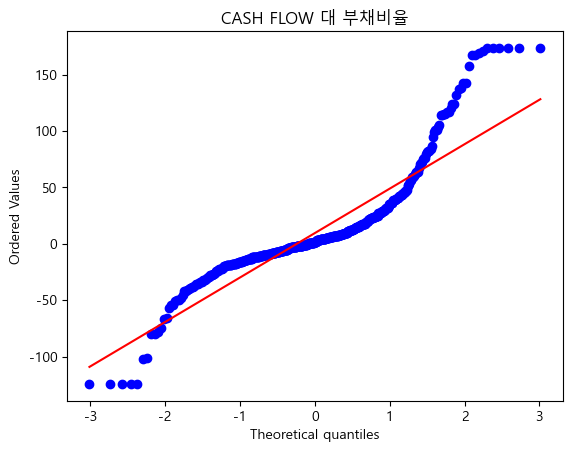

In [45]:
i = 0
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.75, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

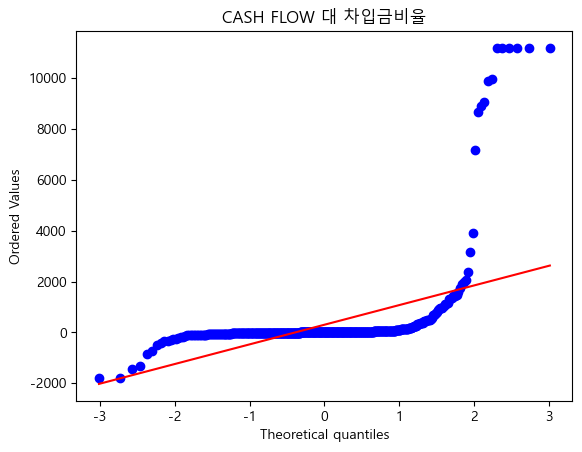

In [46]:
i = 1
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

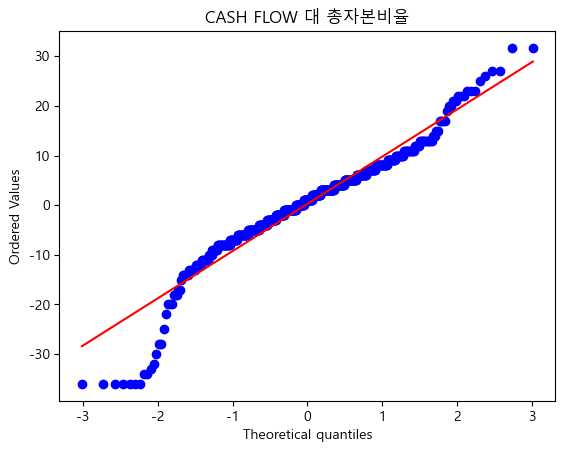

In [47]:
i = 2
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

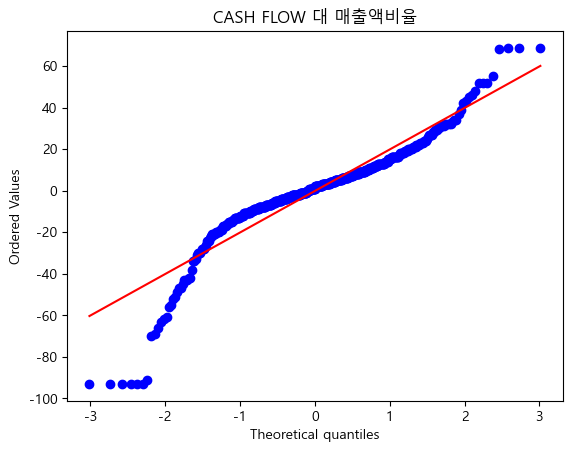

In [48]:
i = 3
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

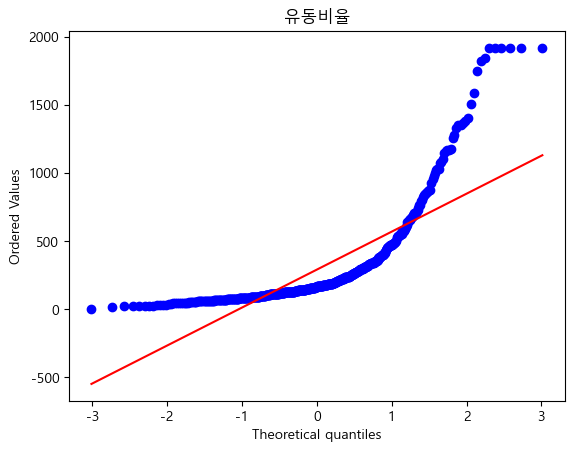

In [49]:
i = 4
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

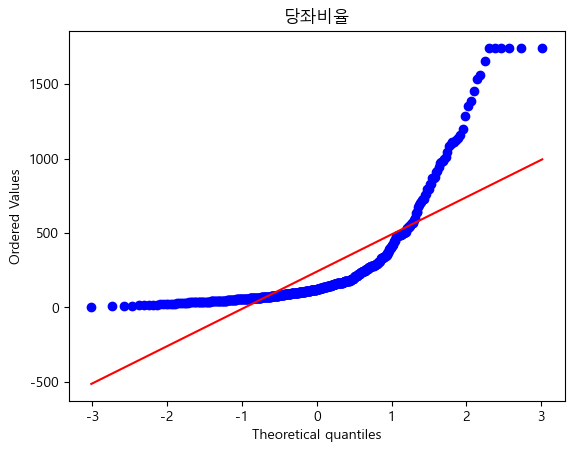

In [50]:
i = 5
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

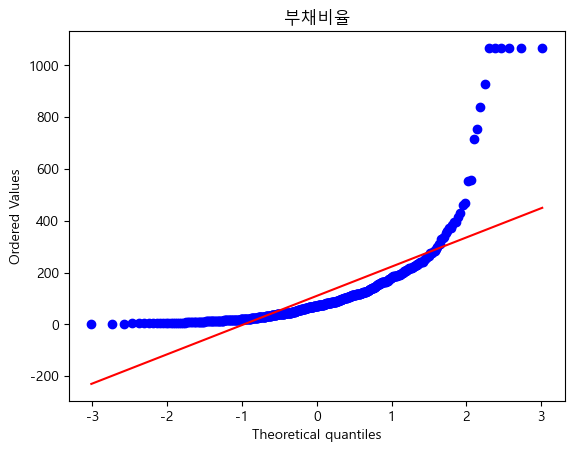

In [51]:
i = 6
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

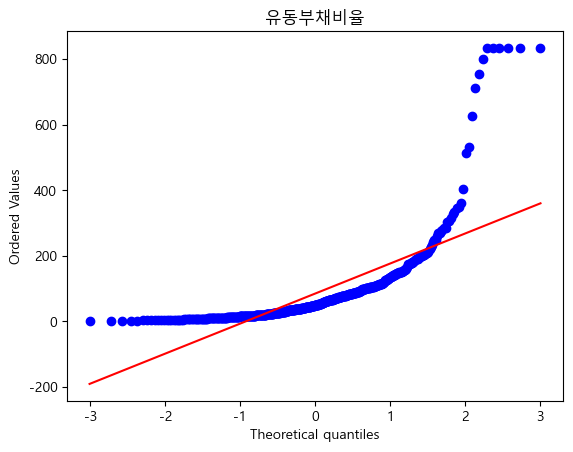

In [52]:
i = 7
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

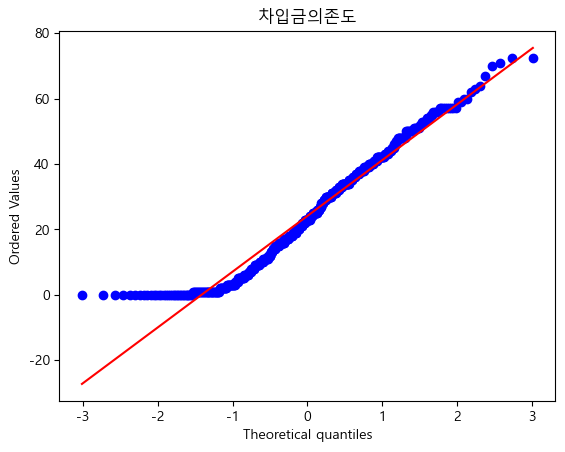

In [53]:
i = 8
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

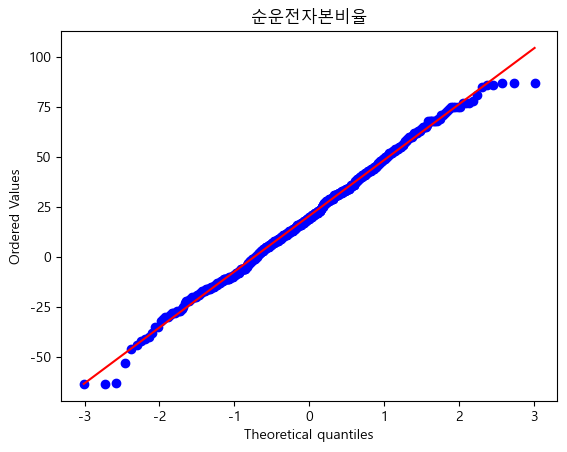

In [54]:
i = 9
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

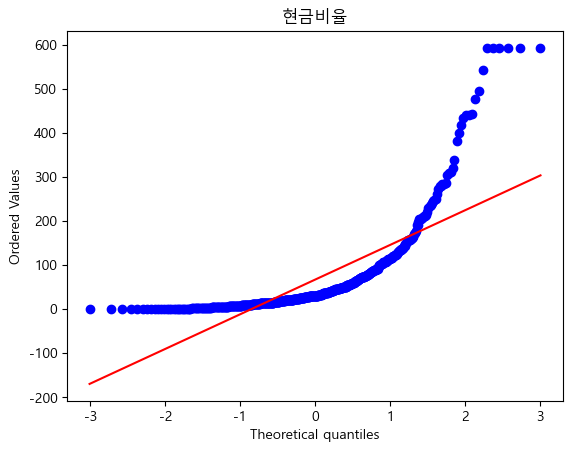

In [55]:
i = 10
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

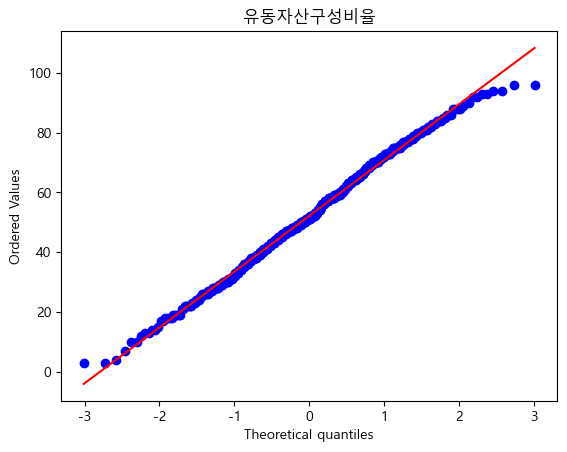

In [56]:
i = 11
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

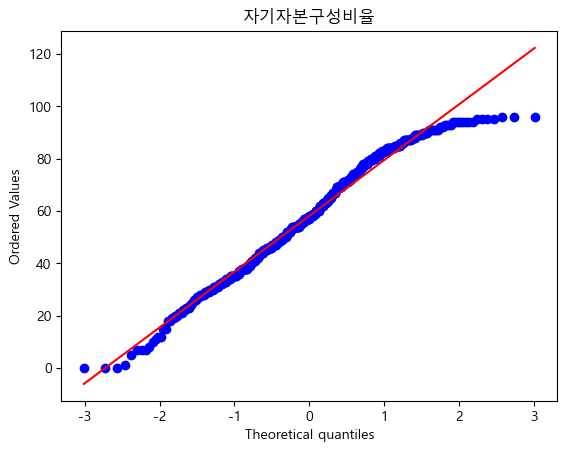

In [57]:
i = 12
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=100)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

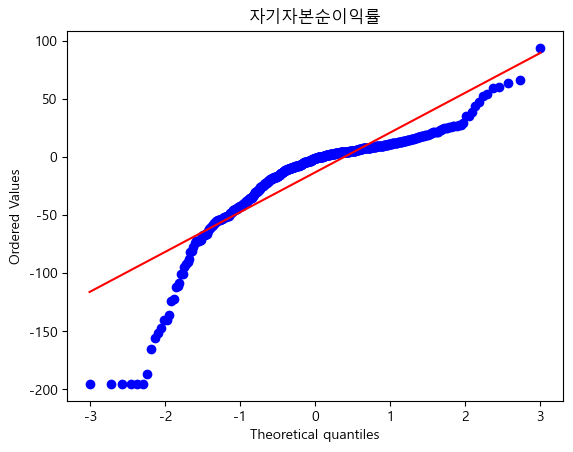

In [58]:
i = 13
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

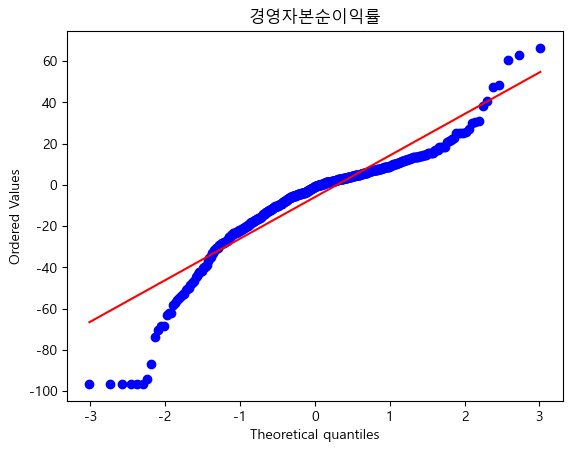

In [59]:
i = 14
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

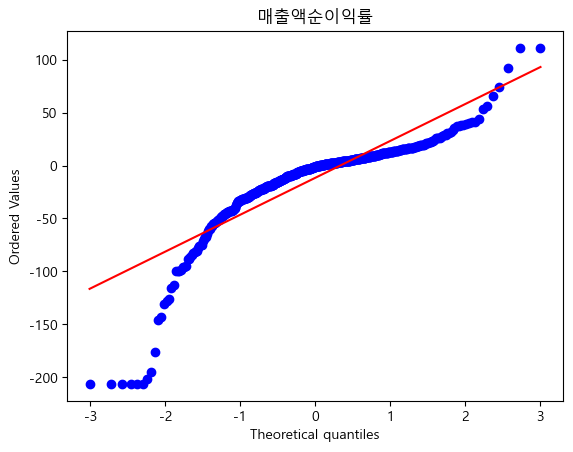

In [60]:
i = 15
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

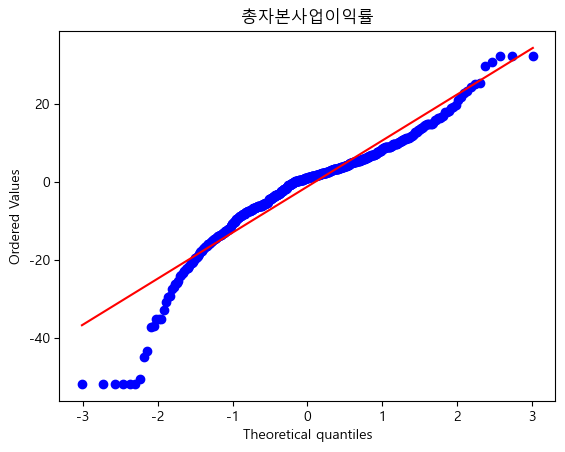

In [61]:
i = 16
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

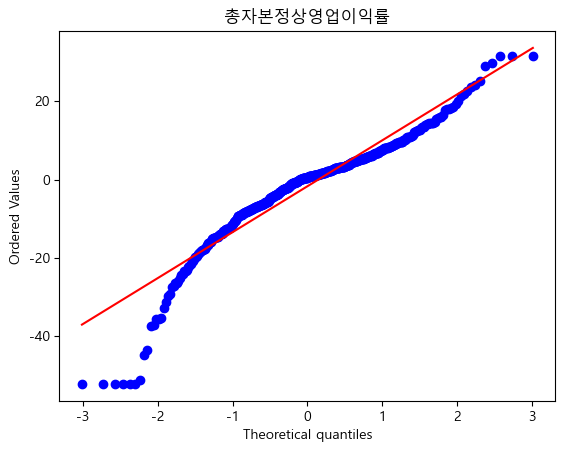

In [62]:
i = 17
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

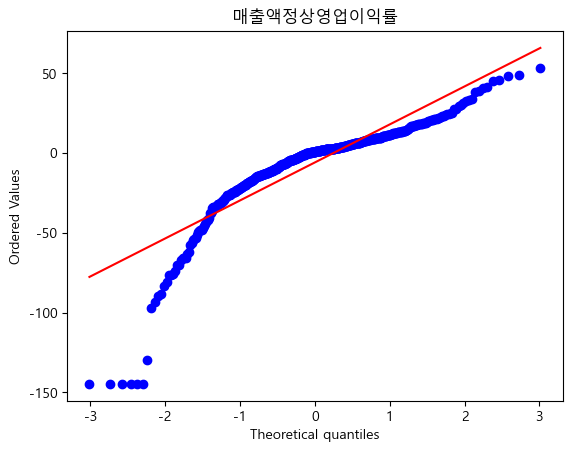

In [63]:
i = 18
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

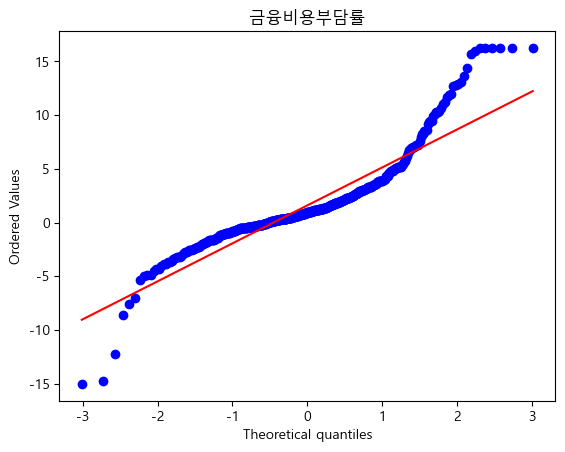

In [64]:
i = 19
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

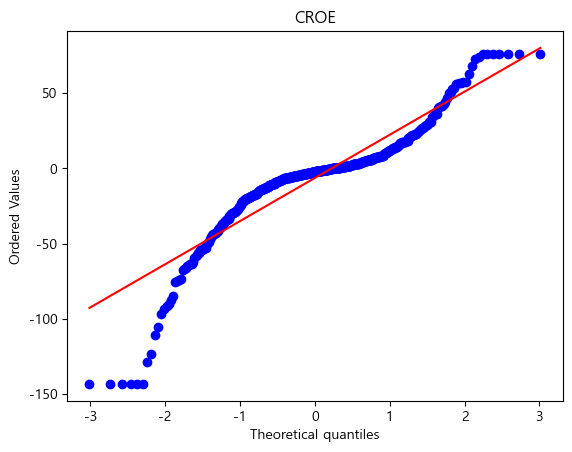

In [65]:
i = 20
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

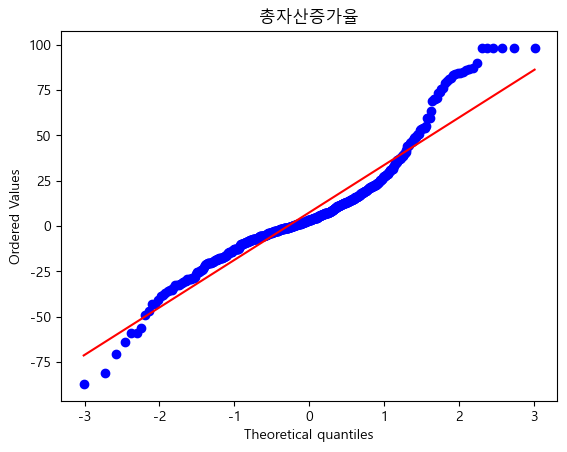

In [66]:
i = 21
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

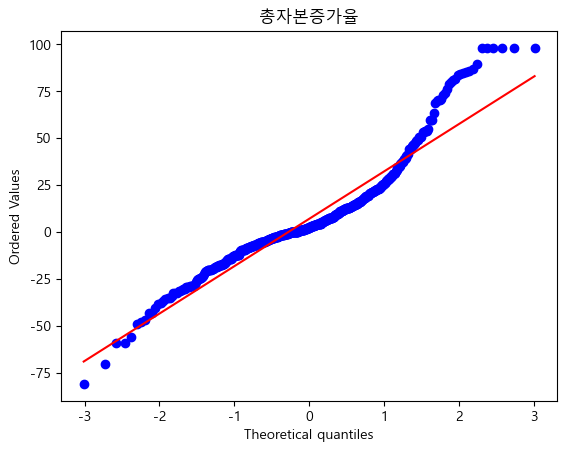

In [67]:
i = 22
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

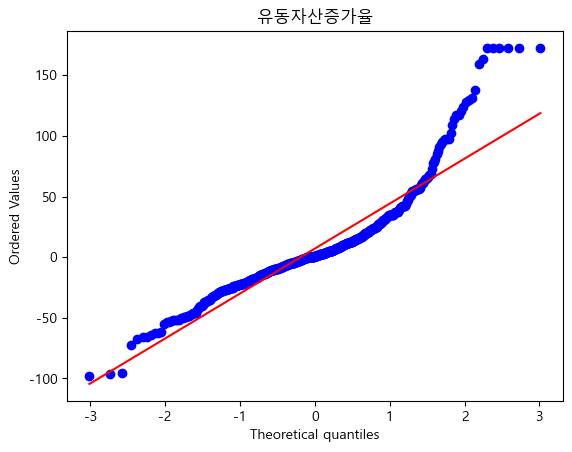

In [68]:
i = 23
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

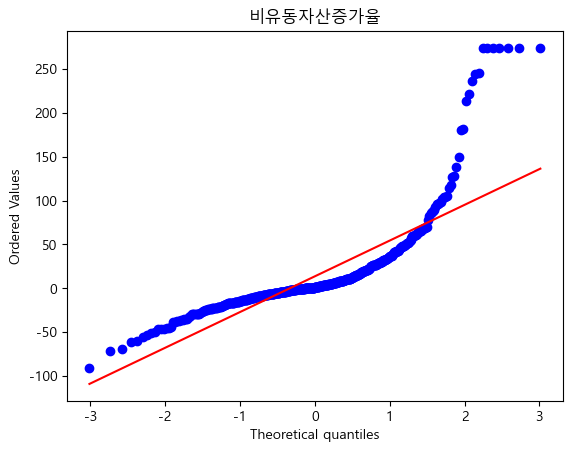

In [69]:
i = 24
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

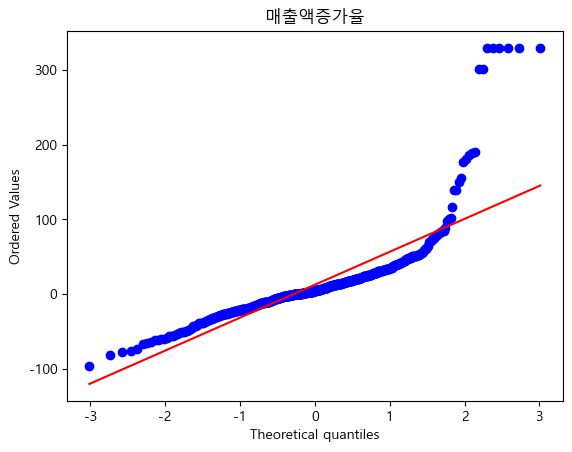

In [70]:
i = 25
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

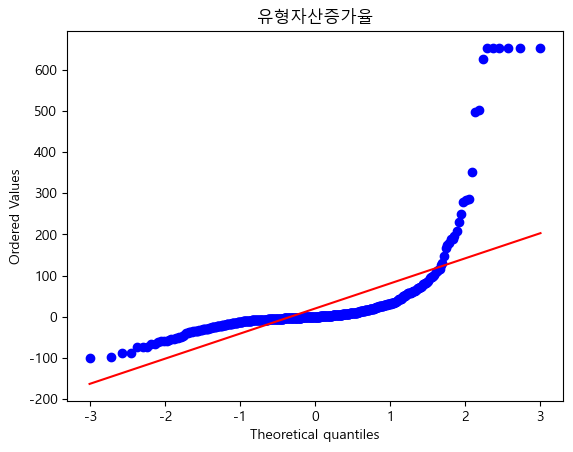

In [71]:
i = 26
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

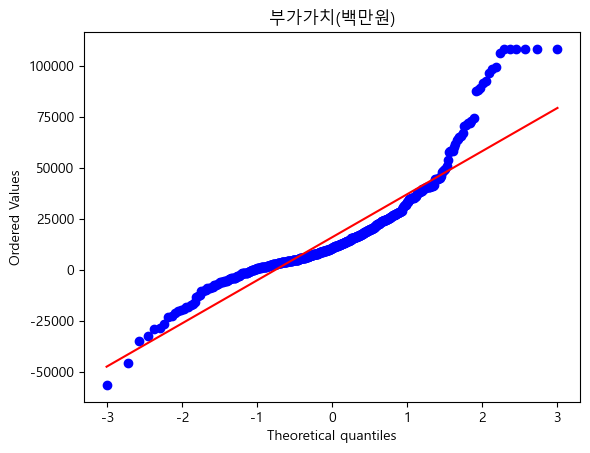

In [72]:
i = 27
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

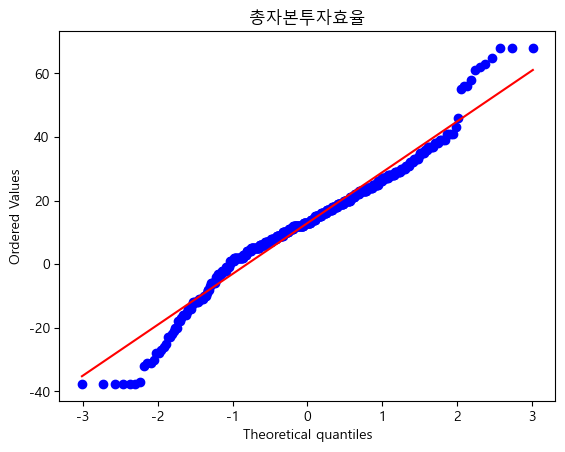

In [73]:
i = 28
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

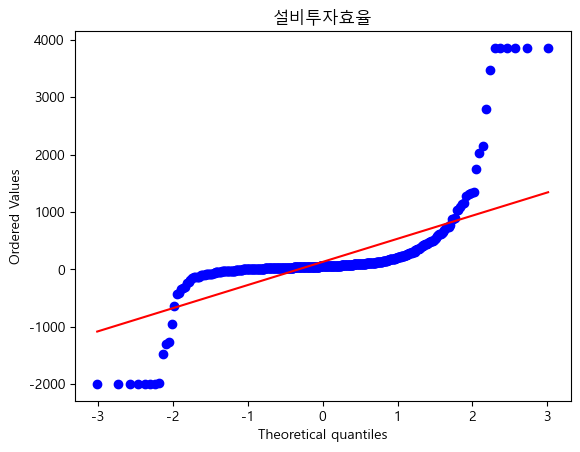

In [74]:
i = 29
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

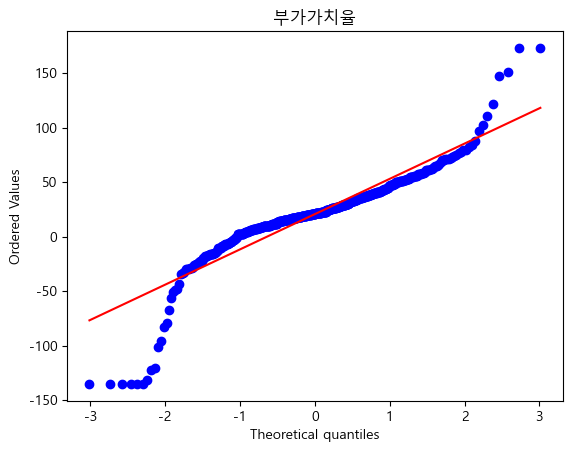

In [75]:
i = 30
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

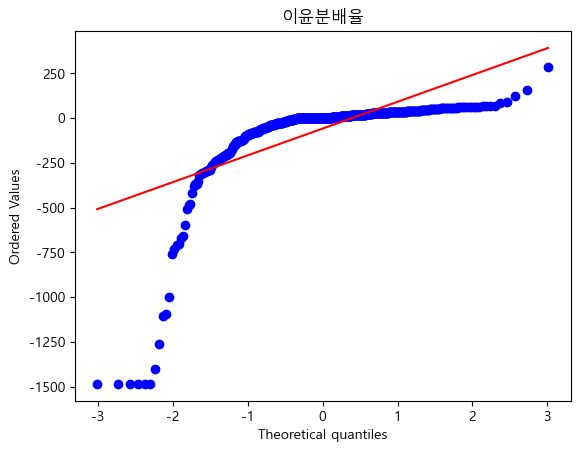

In [76]:
i = 31
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

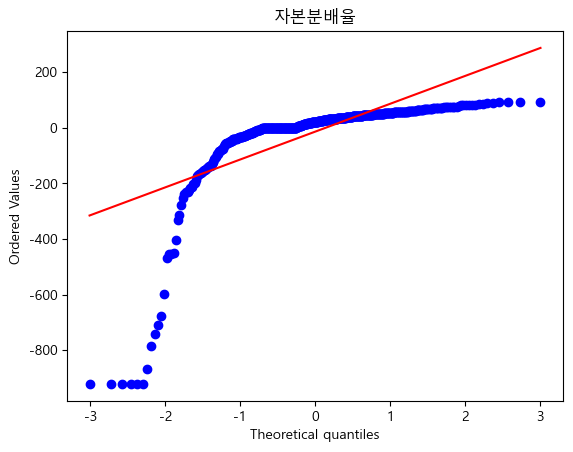

In [77]:
i = 32
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

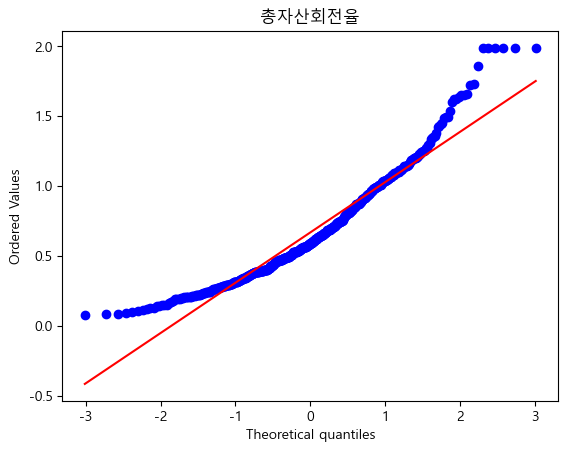

In [78]:
i = 33
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

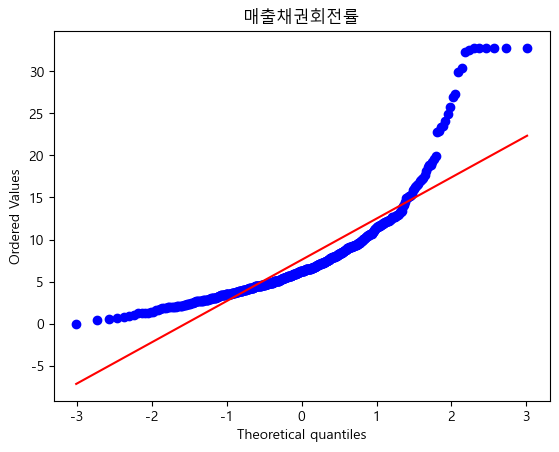

In [79]:
i = 34
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

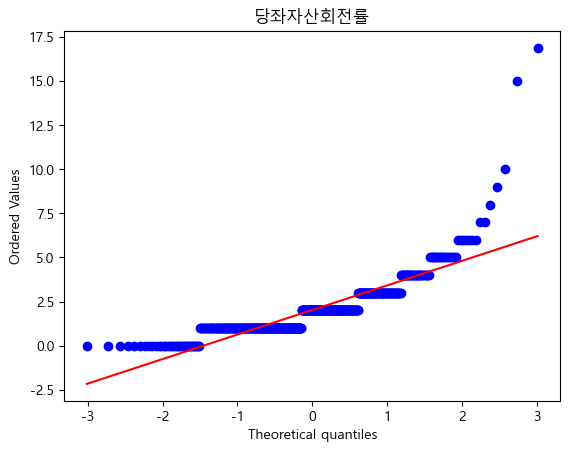

In [80]:
i = 35
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

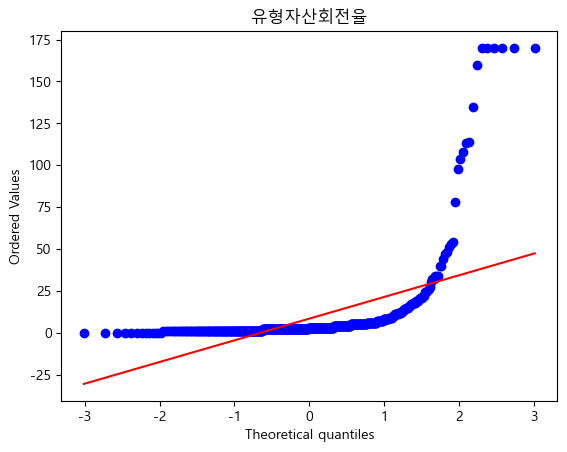

In [81]:
i = 36
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

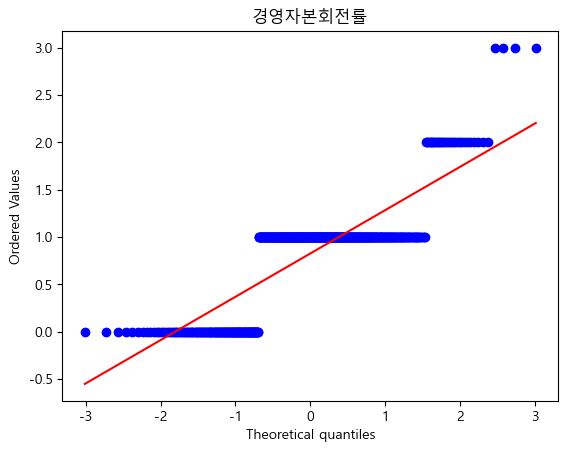

In [82]:
i = 37
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

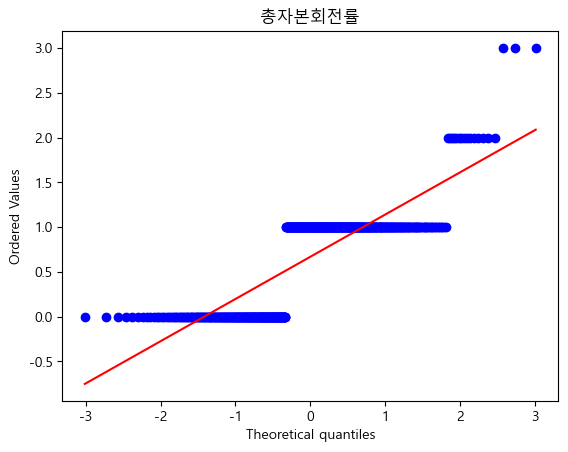

In [83]:
i = 38
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

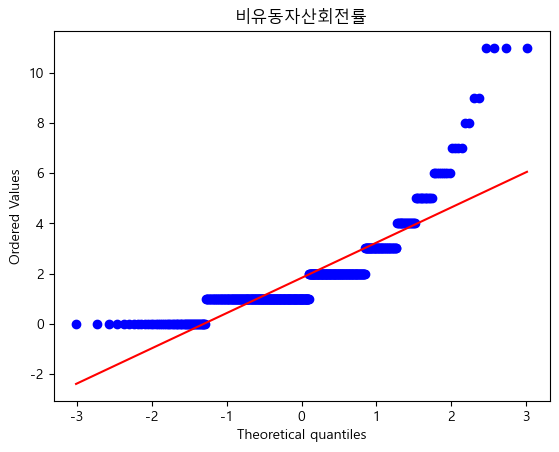

In [84]:
i = 39
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.5)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

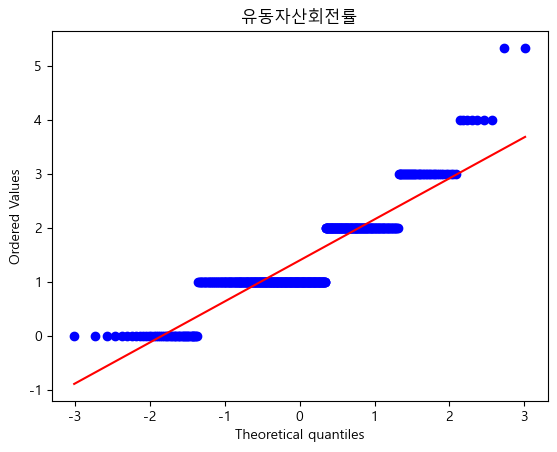

In [85]:
i = 40
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

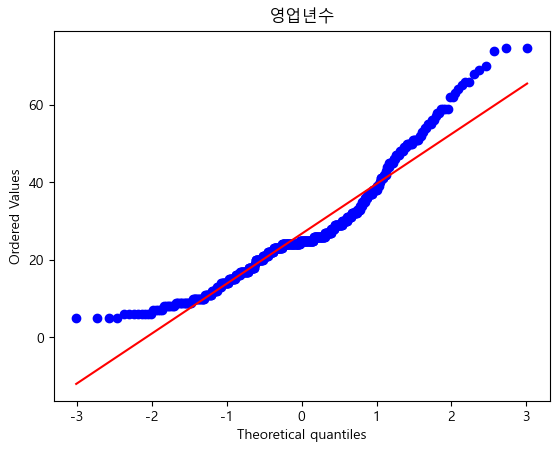

In [86]:
i = 41
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.75)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

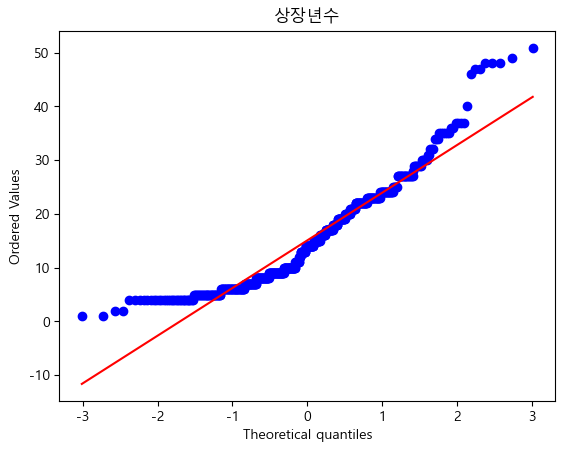

In [87]:
i = 42
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99.99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

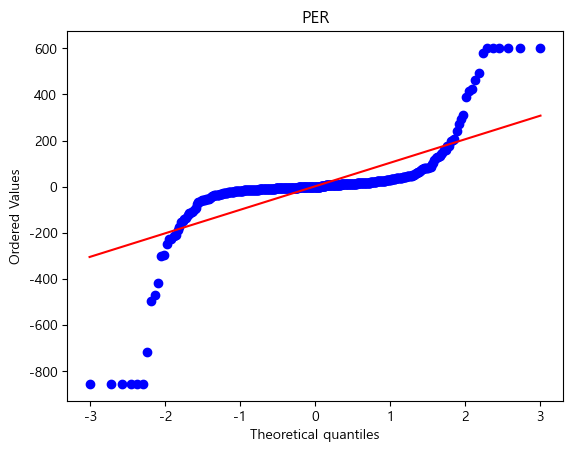

In [88]:
i = 43
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

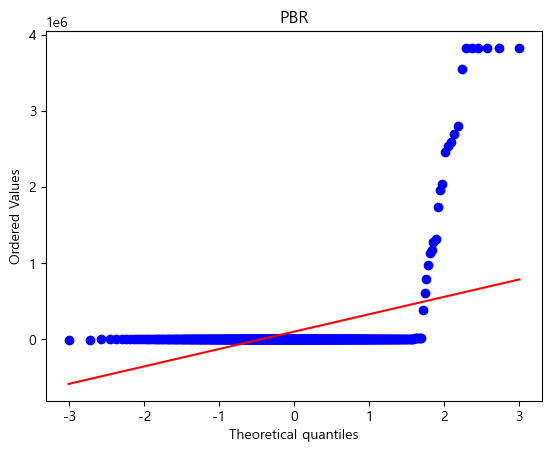

In [89]:
i = 44
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0.25, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

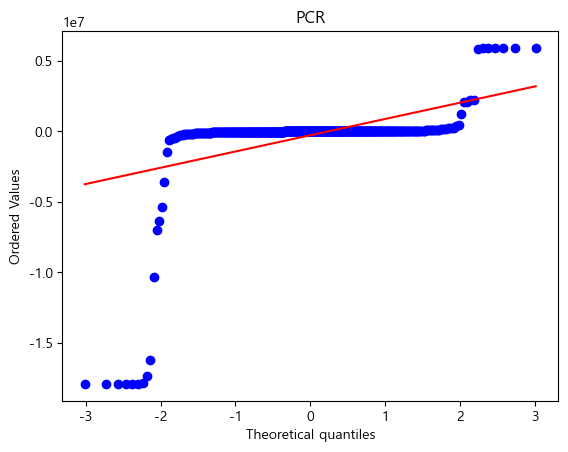

In [90]:
i = 45
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=1, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

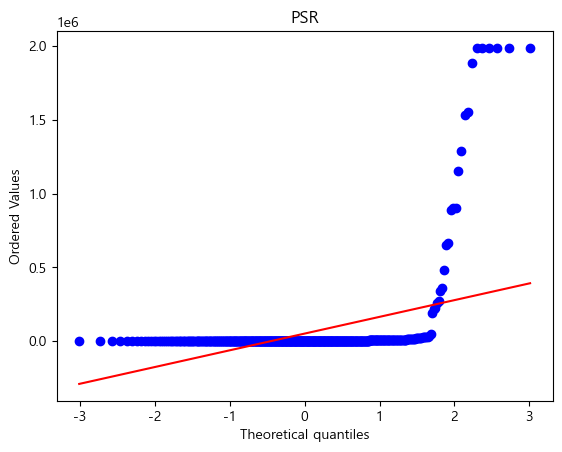

In [91]:
i = 46
col = features.columns[i]
raw_data = features[col]
winsorized_data = winsorize(raw_data, lower_percentile=0, upper_percentile=99)
winsorized_features[col] = winsorized_data
stats.probplot(winsorized_data, dist="norm", plot=plt)
plt.title(col)
plt.show()

# after QQplot

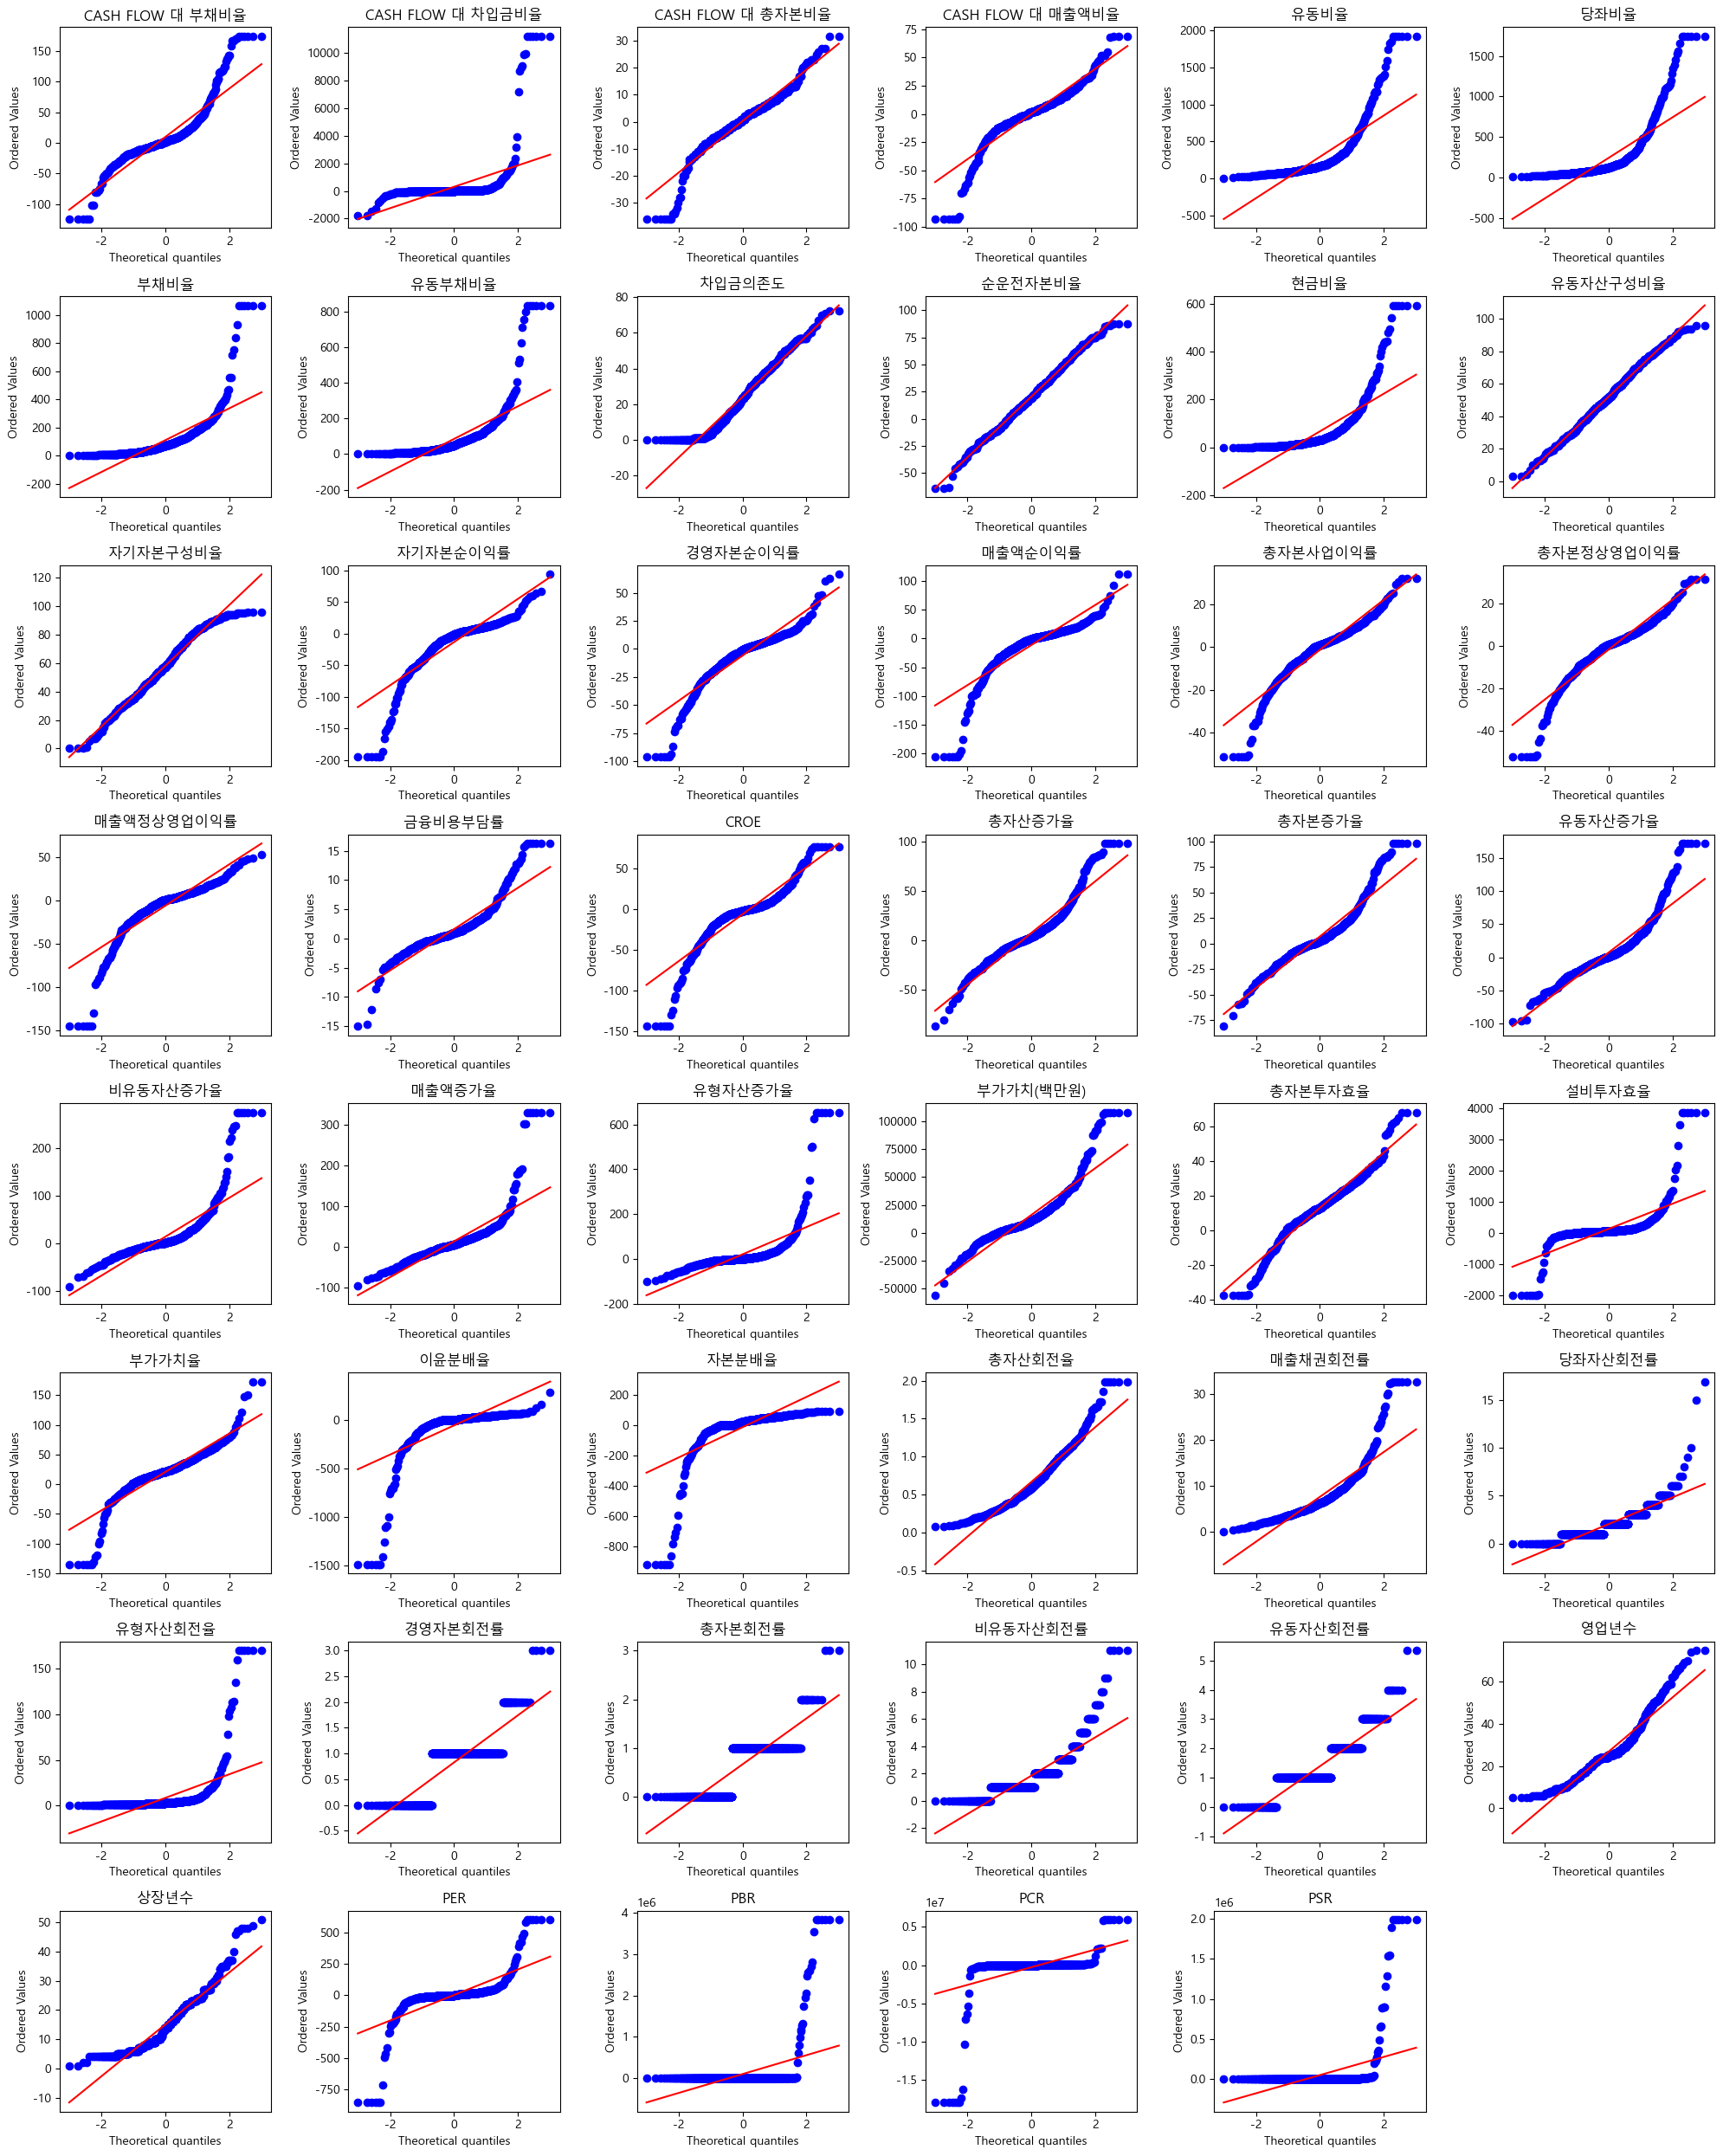

In [92]:
qq_plot(winsorized_features)

In [106]:
winsorized_features[stability_ft1.columns]

,유동비율,당좌비율,부채비율,유동부채비율,차입금의존도,순운전자본비율,현금비율,유동자산구성비율,자기자본구성비율
563,76.000,76.000,75.000,62.000,29.000,-9.000,16.000,27.000,57
54,1920.370,1533.000,7.000,4.000,1.000,77.000,75.000,81.000,94
265,1073.000,979.000,71.000,14.000,35.000,77.000,19.000,85.000,59
634,745.000,730.000,13.000,10.000,3.000,55.000,159.000,64.000,88
286,255.000,158.000,27.000,26.000,19.000,32.000,60.000,53.000,79
...,...,...,...,...,...,...,...,...,...
687,383.000,148.000,34.000,26.000,14.000,55.000,28.000,74.000,75
409,58.000,40.000,754.000,713.000,40.000,-35.000,4.000,48.000,12
344,215.000,166.000,39.000,37.000,17.000,30.000,3.000,57.000,72
273,99.000,89.000,242.000,233.000,31.000,-1.000,14.000,67.000,29


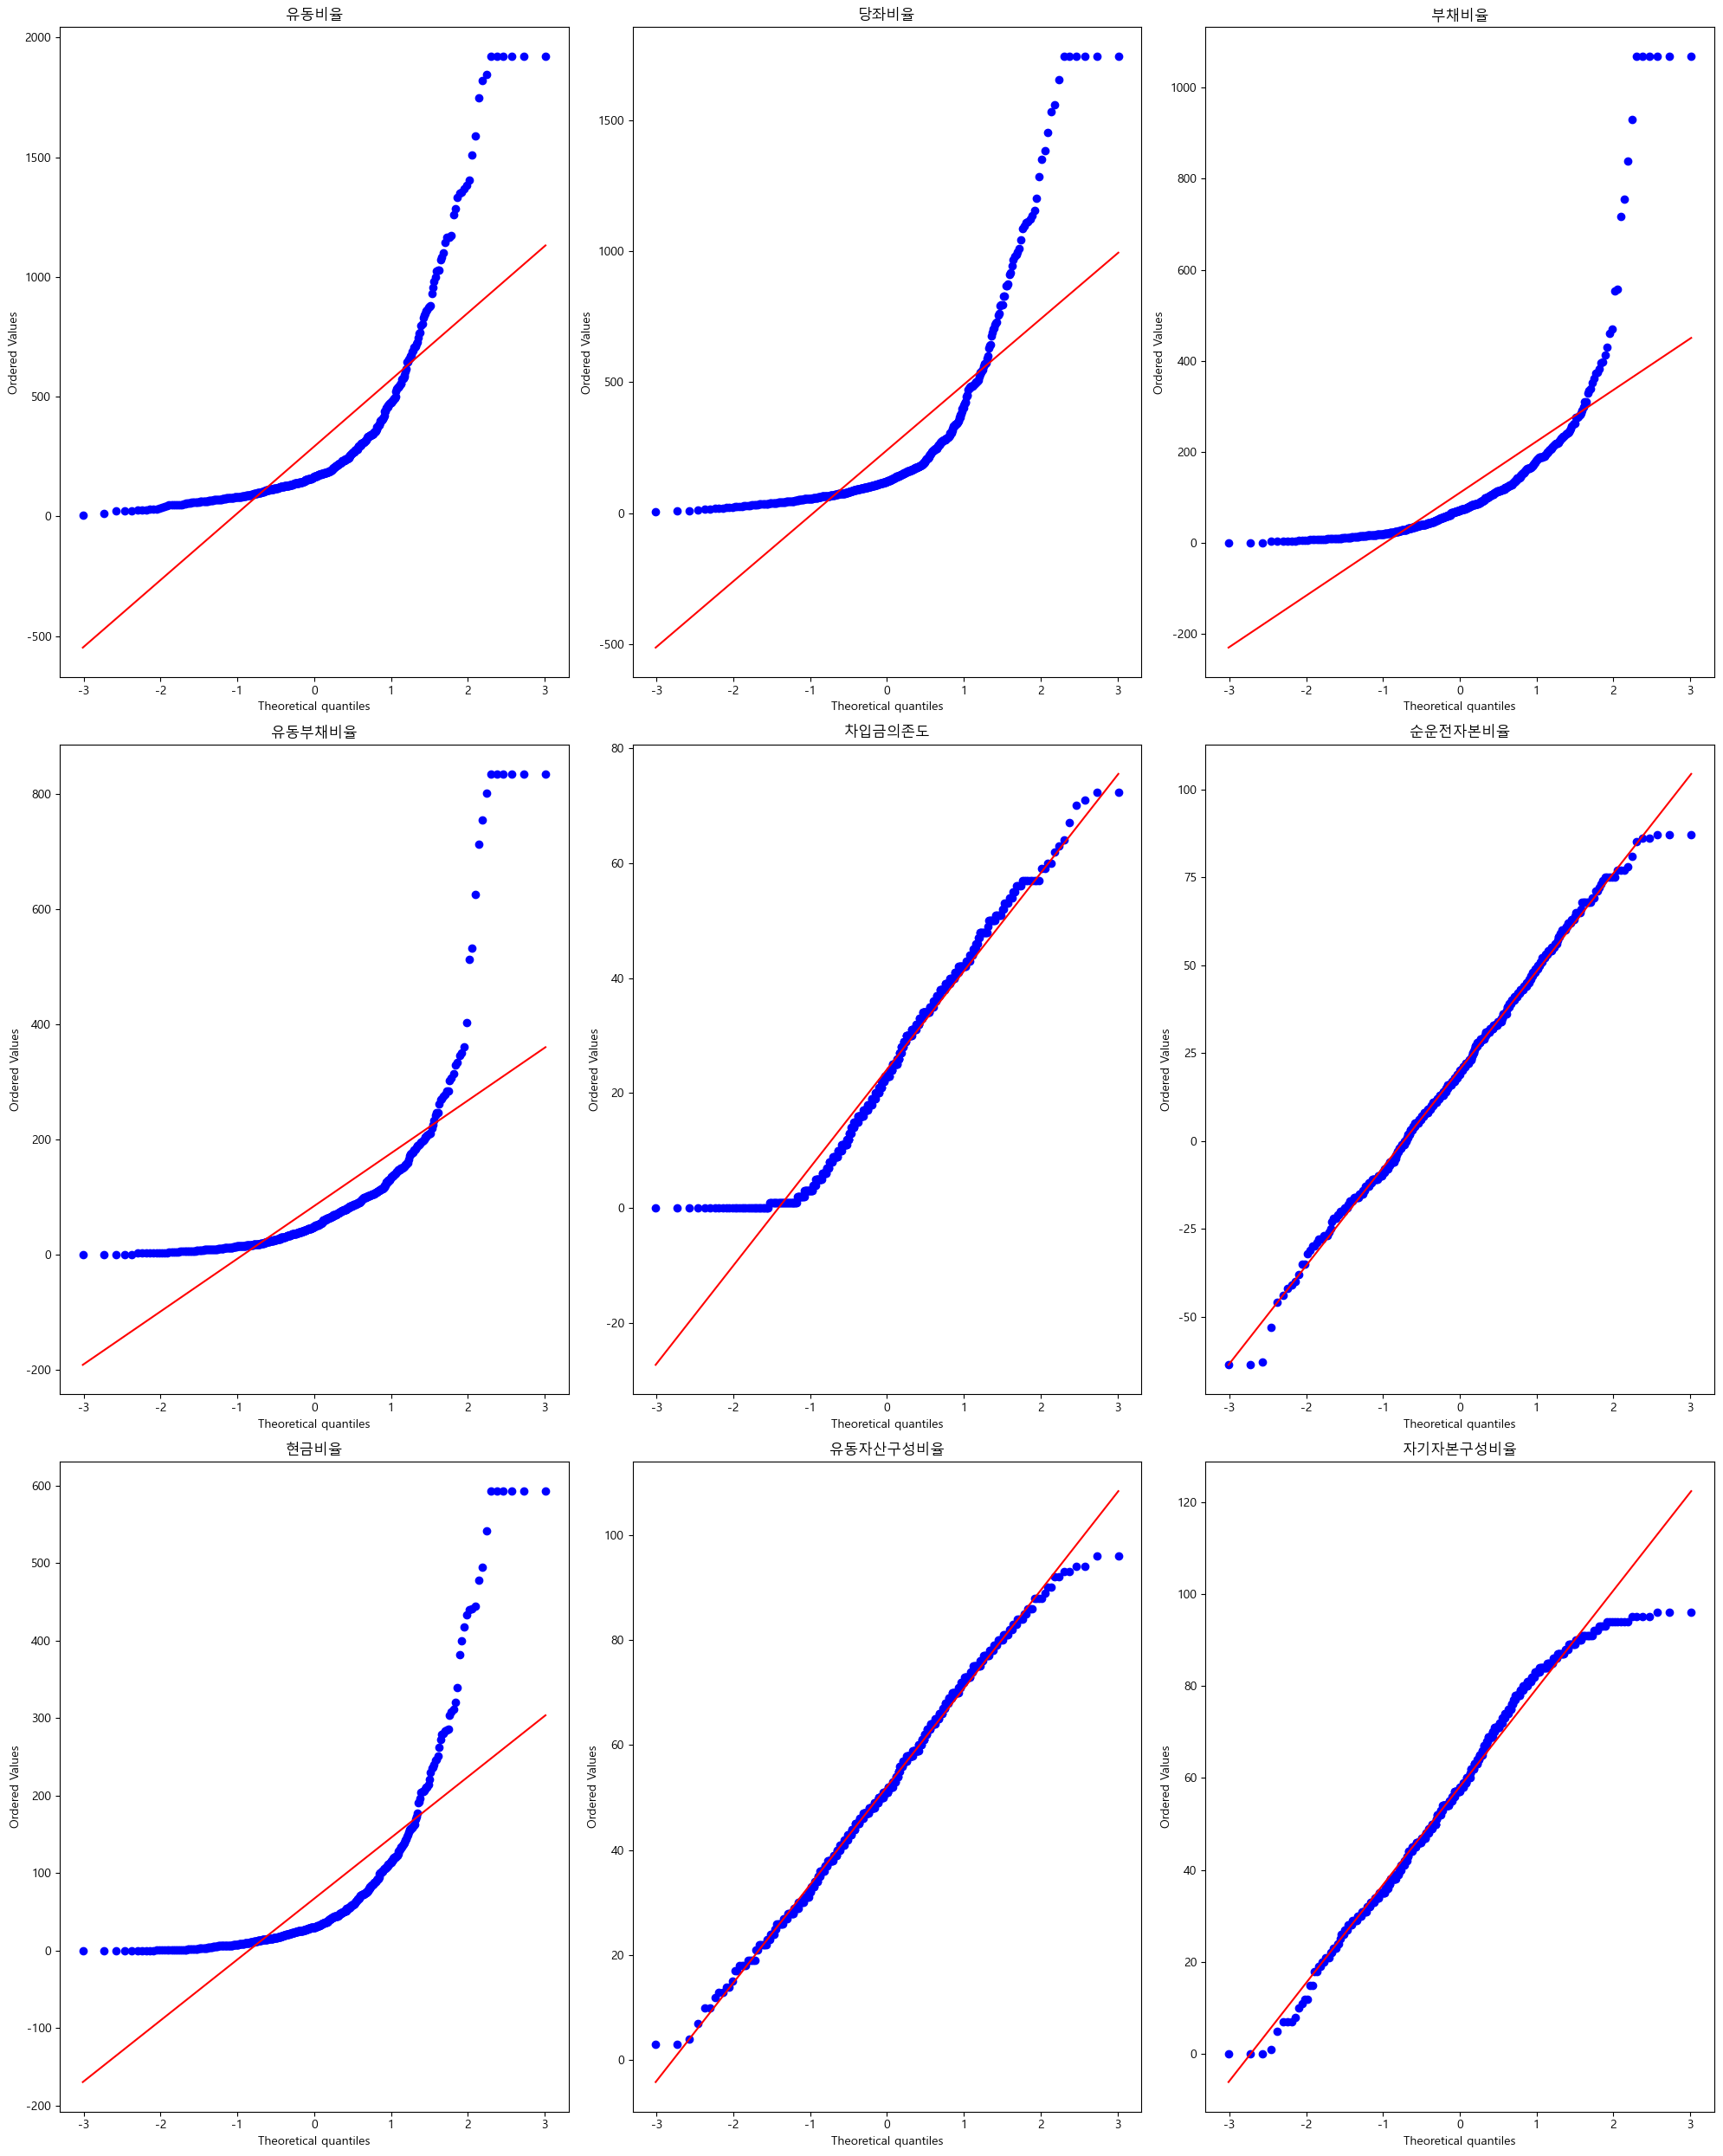

In [107]:
qq_plot33(winsorized_features[stability_ft1.columns])

# to_csv

train set

In [93]:
listed_X_train[features.columns] = winsorized_features

In [94]:
# feature와 label을 하나의 csv 파일로 만들예정
listed_X_train['부실판단'] = listed_y_train
listed_X_train['부실판단']

563   1.000
54    0.000
265   1.000
634   0.000
286   0.000
       ... 
687   1.000
409   1.000
344   0.000
273   1.000
340   0.000
Name: 부실판단, Length: 534, dtype: float64

In [95]:
listed_X_train.to_csv('./listed_winsorized_train_data.csv', index=False)

In [96]:
listed_X_train

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,상장년수,PER,PBR,PCR,PSR,도입기,성숙기,성장기,쇠퇴기,부실판단
563,성우테크론(주),45300,2014,9.000,13.000,4.000,9.000,76.000,76.000,75.000,...,23.000,-13.309,415.231,8357.516,593.832,0,0,1,0,1.000
54,(주)동일기연,32960,2022,76.000,363.000,5.000,12.000,1920.370,1533.000,7.000,...,27.000,19.185,757.326,12876.467,1763.156,0,1,0,0,0.000
265,(주)엔지켐생명과학,183490,2020,-28.000,-34.000,-12.000,-56.000,1073.000,979.000,71.000,...,6.000,-51.340,12062.574,-62358.977,33864.410,1,0,0,0,1.000
634,유엔젤(주),72130,2022,-2.000,-8.000,0.000,-1.000,745.000,730.000,13.000,...,21.000,47.778,738.523,-16240.220,1321.965,0,0,0,1,0.000
286,(주)오이솔루션,138080,2022,-1.000,-2.000,0.000,-1.000,255.000,158.000,27.000,...,10.000,-36.066,1266.354,-23431.206,2429.817,0,0,0,1,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,한국정밀기계(주),101680,2014,11.000,21.000,3.000,9.000,383.000,148.000,34.000,...,15.000,-4.289,355.983,9522.382,822.739,0,0,1,0,1.000
409,(주)코세스,89890,2015,7.000,15.000,6.000,5.000,58.000,40.000,754.000,...,18.000,-31.818,6549.214,75714.717,654.188,0,1,0,0,1.000
344,(주)인터로조,119610,2022,18.000,29.000,5.000,10.000,215.000,166.000,39.000,...,14.000,16.482,1970.395,30936.894,2936.356,0,0,1,0,0.000
273,(주)엠젠솔루션,32790,2014,4.000,9.000,3.000,1.000,99.000,89.000,242.000,...,27.000,-3.507,619.574,12727.985,76.843,0,1,0,0,1.000


test set

In [97]:
# feature와 label을 하나의 csv 파일로 만들예정
listed_X_test['부실판단'] = listed_y_test
listed_X_test['부실판단']

153   0.000
263   0.000
423   0.000
174   1.000
681   1.000
       ... 
89    0.000
418   1.000
578   1.000
92    0.000
305   1.000
Name: 부실판단, Length: 197, dtype: float64

In [98]:
listed_X_test.to_csv('./listed_winsorized_test_data.csv', index=False)

In [99]:
listed_X_test

,회사명,거래소코드,회계년도,CASH FLOW 대 부채비율,CASH FLOW 대 차입금비율,CASH FLOW 대 총자본비율,CASH FLOW 대 매출액비율,유동비율,당좌비율,부채비율,...,상장년수,PER,PBR,PCR,PSR,도입기,성숙기,성장기,쇠퇴기,부실판단
153,(주)세우글로벌,13000,2022,53,9484,4,8,1104,976,9,...,35.000,35.652,1026.718,16523.270,1677.622,0,1,0,0,0.000
263,(주)엑시콘,92870,2022,-19,-59,-3,-5,351,177,17,...,9.000,9.009,681.116,-38749.251,1081.816,0,0,0,1,0.000
423,(주)타이거일렉,219130,2022,20,34,5,6,227,148,31,...,9.000,35.237,2283.347,17760.557,2180.069,0,1,0,0,0.000
174,(주)스타플렉스,115570,2020,-3,-3,-2,-3,96,61,134,...,14.000,-1.932,721.653,-64559.536,572.499,0,0,0,1,1.000
681,피에스텍(주),2230,2020,6,12,1,2,1336,1256,14,...,33.000,29.193,679.003,31164.943,1736.937,0,1,0,0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,(주)마니커에프앤지,195500,2022,-7,-11,-3,-3,162,115,60,...,5.000,-187.812,738.476,-3536.365,535.610,0,0,0,1,0.000
418,(주)큐로홀딩스,51780,2014,-1,-1,-1,-3,14,7,138,...,23.000,32.524,479.553,22120.791,1177.257,0,1,0,0,1.000
578,씨앤티85(주),56730,2014,-6,-6,-4,-21,39,24,279,...,22.000,-5.199,5104.721,-23878.730,6915.275,1,0,0,0,1.000
92,(주)매커스,93520,2022,11,3541,7,11,142,119,207,...,17.000,3.998,1367.720,4812.721,658.991,0,1,0,0,0.000
